<a href="https://colab.research.google.com/github/retutux-arch/Desafio_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura Store



## Importación de datos



In [3]:
#!pip install contextily
#!pip install folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import contextily as cx

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##1. Análisis de facturación



### En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [4]:
import pandas as pd

tienda_ingresos = tienda['Precio'].sum()
tienda2_ingresos = tienda2['Precio'].sum()
tienda3_ingresos = tienda3['Precio'].sum()
tienda4_ingresos = tienda4['Precio'].sum()
df_ingresos_tienda = pd.DataFrame({
                                    'Ingresos totales': [tienda_ingresos,
                                                 tienda2_ingresos,
                                                 tienda3_ingresos,
                                                 tienda4_ingresos]},
                                    index=['Tienda 1', 'Tienda 2',
                                          'Tienda 3', 'Tienda 4'])
# Convertir la columna 'Ingresos totales' a tipo entero para eliminar la notación científica
df_ingresos_tienda['Ingresos totales'] = df_ingresos_tienda['Ingresos totales'].astype(int)

# Aplicar formato con separador de miles para la visualización
display(df_ingresos_tienda.style.format({'Ingresos totales': '{:,.0f}'}))

,Ingresos totales
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


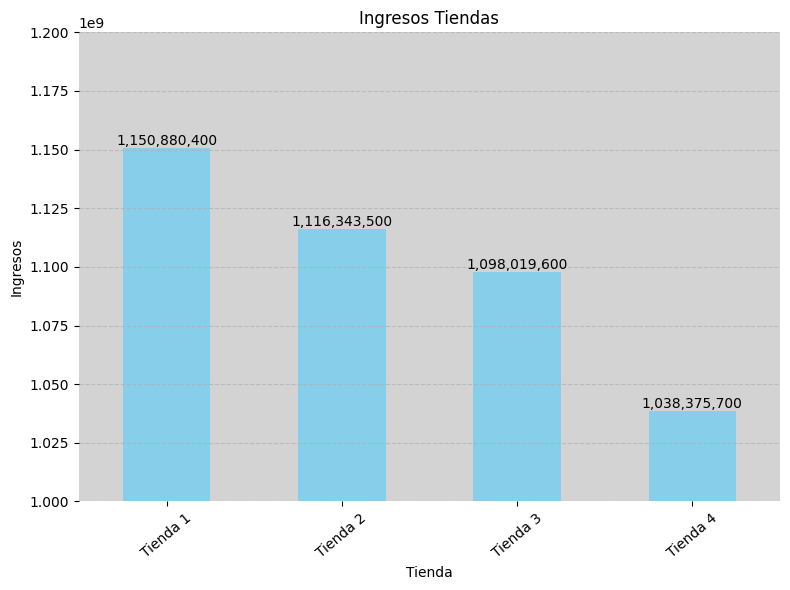

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Corregir el nombre de la columna a 'Ingresos totales'
df_ingresos_tienda['Ingresos totales'].plot(kind='bar', title='Ingresos Tiendas', color='skyblue', ax=axes)
axes.set_ylabel('Ingresos')
axes.set_xlabel('Tienda')
axes.grid(axis='y', linestyle='--', alpha=0.7)
axes.set_facecolor('lightgray')
axes.tick_params(axis='x', colors='black')
axes.tick_params(axis='y', colors='black')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.legend().remove()
# Ajustar los límites del eje y para magnificar las diferencias
axes.set_ylim(1.0e9, 1.2e9) # Ajusta este rango según los valores específicos de tus datos

# Añadir etiquetas de datos a cada barra
for index, value in enumerate(df_ingresos_tienda['Ingresos totales']):
    axes.text(index, value, f'{value:,.0f}', ha='center', va='bottom', color='black')

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

total_ingresos = df_ingresos_tienda['Ingresos totales'].sum()
print(f'El total de ingresos es de {total_ingresos}')

El total de ingresos es de 4403619200


## 2. Ventas por categoría

### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

#### Cantidad vendida por categoria en cada una de las tiendas

In [7]:
import pandas as pd

tienda_categorias = tienda.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda2_categorias = tienda2.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda3_categorias = tienda3.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda4_categorias = tienda4.groupby('Categoría del Producto')['Categoría del Producto'].count()
df_tienda_categorias = pd.DataFrame({ 'Ventas_tienda_1': tienda_categorias,
                                      'Ventas_tienda_2': tienda2_categorias,
                                      'Ventas_tienda_3': tienda3_categorias,
                                      'Ventas_tienda_4': tienda4_categorias})
df_tienda_categorias

,Ventas_tienda_1,Ventas_tienda_2,Ventas_tienda_3,Ventas_tienda_4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


#### Cantidad vendida por categoria en base a porcentaje en cada una de las tiendas

In [8]:
import pandas as pd

mas_vendido_tienda= tienda['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda2= tienda2['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda3= tienda3['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda4= tienda4['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
df_populares = pd.DataFrame({ 'Mas_vendido_tienda_1': (mas_vendido_tienda['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_2': (mas_vendido_tienda2['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_3': (mas_vendido_tienda3['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_4': (mas_vendido_tienda4['proportion'] * 100).round(2)})
df_populares

,Mas_vendido_tienda_1,Mas_vendido_tienda_2,Mas_vendido_tienda_3,Mas_vendido_tienda_4
Categoría del Producto,,,,
Artículos para el hogar,7.25,7.67,7.50,8.52
Deportes y diversión,12.04,11.66,11.74,11.75
Electrodomésticos,13.23,12.93,11.78,10.77
Electrónicos,18.99,17.89,19.12,19.13
Instrumentos musicales,7.72,9.50,7.50,7.21
Juguetes,13.73,13.27,13.35,14.33
Libros,7.33,8.35,7.84,7.93
Muebles,19.71,18.74,21.15,20.36


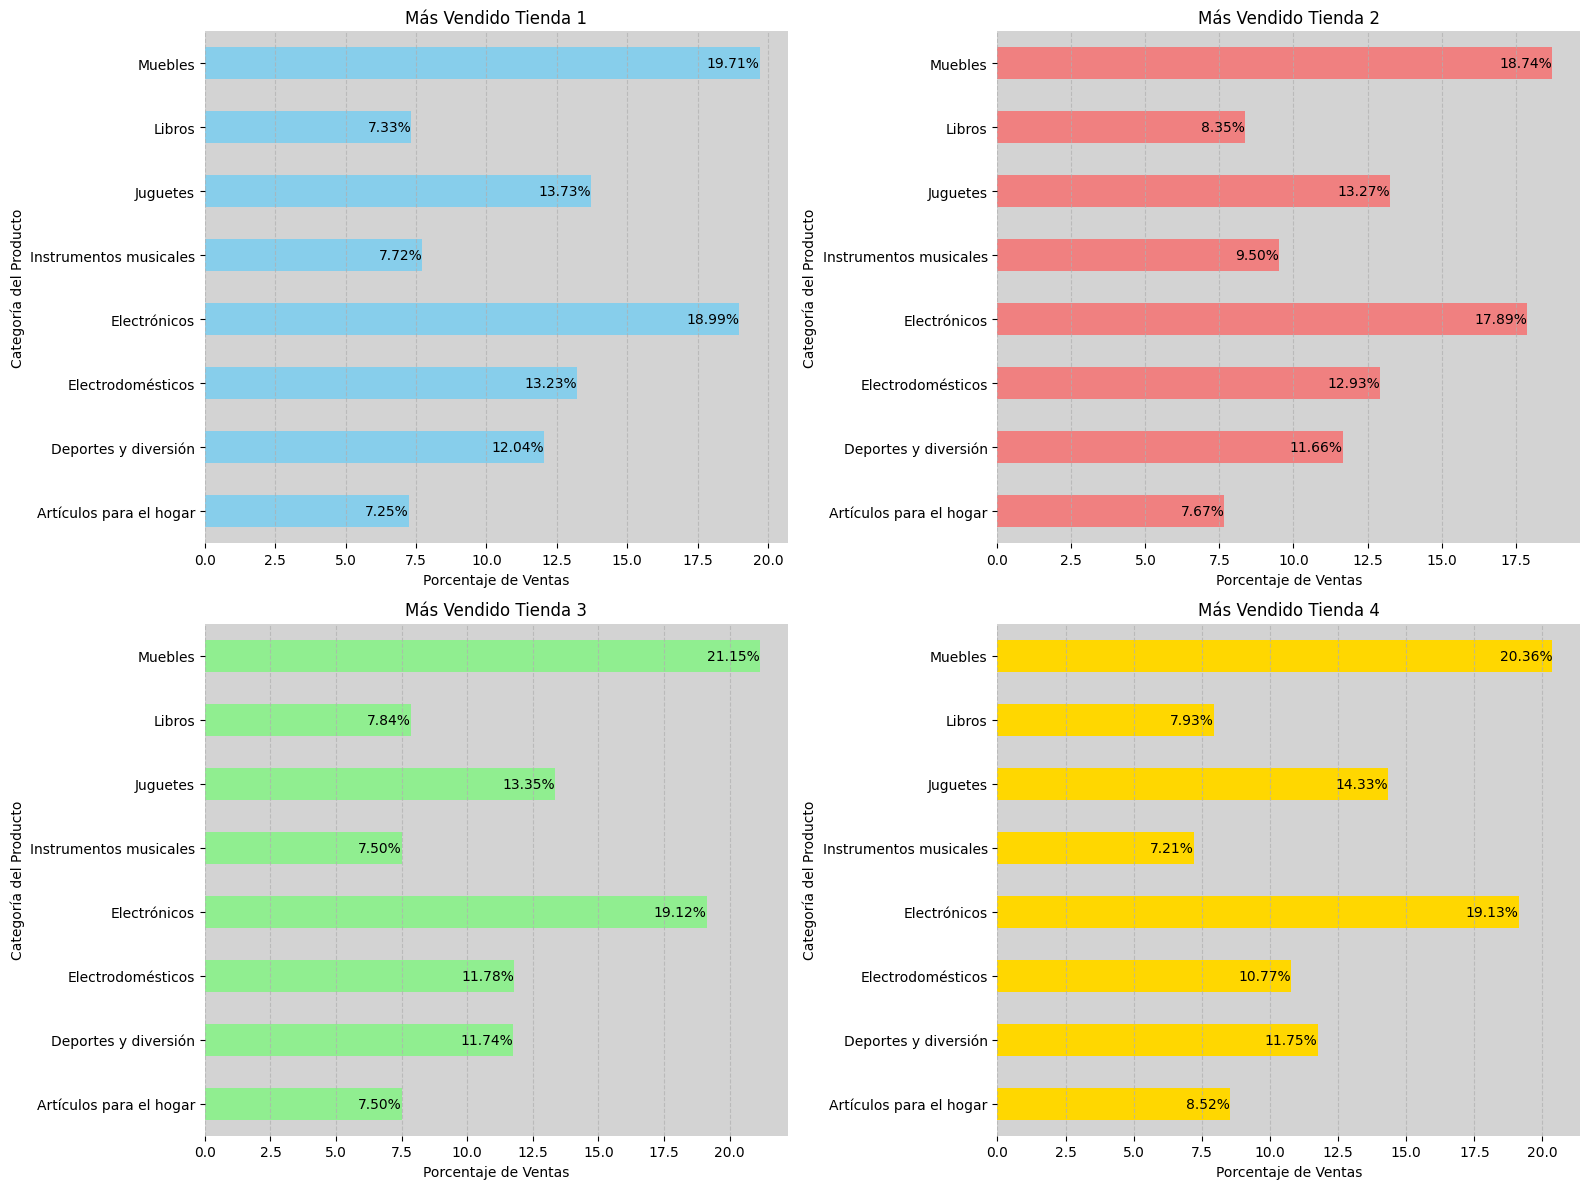

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

df_populares['Mas_vendido_tienda_1'].plot(kind='barh', ax=axes[0, 0], title='Más Vendido Tienda 1', color='skyblue')
df_populares['Mas_vendido_tienda_2'].plot(kind='barh', ax=axes[0, 1], title='Más Vendido Tienda 2', color='lightcoral')
df_populares['Mas_vendido_tienda_3'].plot(kind='barh', ax=axes[1, 0], title='Más Vendido Tienda 3', color='lightgreen')
df_populares['Mas_vendido_tienda_4'].plot(kind='barh', ax=axes[1, 1], title='Más Vendido Tienda 4', color='gold')

for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('Porcentaje de Ventas')
        ax.set_ylabel('Categoría del Producto')
        ax.grid(axis='x', linestyle='--', alpha=0.7)
        ax.set_facecolor('lightgray')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.legend().remove()
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.2f}%',
                          (p.get_width(), p.get_y() +  p.get_height() / 2),
                           ha='right', va='center', color='black')

plt.tight_layout()
plt.show()

## 3. Calificación promedio de la tienda


### En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [10]:
import pandas as pd

calificacion_tienda = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()
df_nota_promedio = pd.DataFrame({'Calificacion': [calificacion_tienda,
                                                  calificacion_tienda2,
                                                  calificacion_tienda3,
                                                  calificacion_tienda4]},
                                      index=['Tienda 1', 'Tienda 2',
                                          'Tienda 3', 'Tienda 4']).round(2)

df_nota_promedio = df_nota_promedio.sort_values(by='Calificacion', ascending=True)
df_nota_promedio

,Calificacion
Tienda 1,3.98
Tienda 4,4.00
Tienda 2,4.04
Tienda 3,4.05


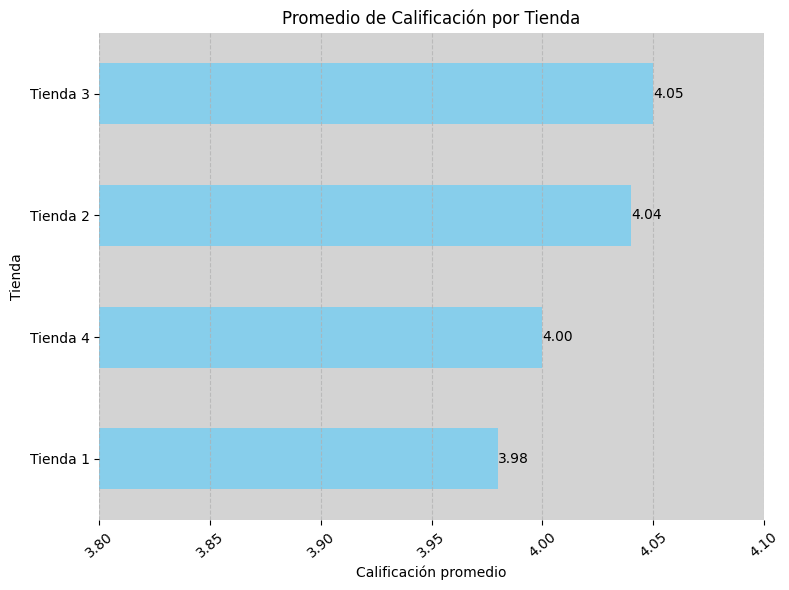

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))


df_nota_promedio['Calificacion'].plot(kind='barh', ax=ax, color='skyblue')
ax.set_title('Promedio de Calificación por Tienda')
ax.set_ylabel('Tienda')
ax.set_xlabel('Calificación promedio')
ax.set_xlim(3.8, 4.1)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_facecolor('lightgray')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend().remove()

# Añadir etiquetas de datos a cada barra
for index, value in enumerate(df_nota_promedio['Calificacion']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='left', color='black')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

## 4. Productos más y menos vendidos

### En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [12]:
import pandas as pd
cantidad_por_producto = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)

producto_mas_vendido = cantidad_por_producto.index[0]
cantidad_mas_vendido = cantidad_por_producto.iloc[0]

producto_menos_vendido = cantidad_por_producto.index[-1]
cantidad_menos_vendido = cantidad_por_producto.iloc[-1]

df_mas_menos_vendidos = pd.DataFrame({
    'Cantidad': [cantidad_mas_vendido, cantidad_menos_vendido]
}, index=[producto_mas_vendido, producto_menos_vendido])

df_mas_menos_vendidos

,Cantidad
Armario,60
Auriculares con micrófono,33


In [13]:
import pandas as pd

# Lista de DataFrames de las tiendas y sus nombres
nombres_tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

def producto_mas_menos_vendido(df, nombre_tienda):
    """
    Calcula el producto más y menos vendido para un DataFrame de tienda dado.
    Retorna una lista de diccionarios con la información.
    """
    cantidad_por_producto = df.groupby('Producto')['Producto'].count().sort_values(ascending=False)

    producto_mas_vendido = cantidad_por_producto.index[0]
    cantidad_mas_vendido = cantidad_por_producto.iloc[0]

    producto_menos_vendido = cantidad_por_producto.index[-1]
    cantidad_menos_vendido = cantidad_por_producto.iloc[-1]

    return [
        {'Tienda': nombre_tienda, 'Tipo': 'Más Vendido',
        'Producto': producto_mas_vendido, 'Cantidad': cantidad_mas_vendido},
        {'Tienda': nombre_tienda, 'Tipo': 'Menos Vendido',
         'Producto': producto_menos_vendido, 'Cantidad': cantidad_menos_vendido}
            ]

# Recopilar datos de todas las tiendas
total_productos = []
for nombre_tienda, df_tienda in nombres_tiendas.items():
    total_productos.extend(producto_mas_menos_vendido(df_tienda, nombre_tienda))

# Crear el DataFrame consolidado
df_productos_vendidos_por_tienda = pd.DataFrame(total_productos)
display(df_productos_vendidos_por_tienda)


,Tienda,Tipo,Producto,Cantidad
0,Tienda 1,Más Vendido,Armario,60
1,Tienda 1,Menos Vendido,Auriculares con micrófono,33
2,Tienda 2,Más Vendido,Iniciando en programación,65
3,Tienda 2,Menos Vendido,Juego de mesa,32
4,Tienda 3,Más Vendido,Kit de bancas,57
5,Tienda 3,Menos Vendido,Bloques de construcción,35
6,Tienda 4,Más Vendido,Cama box,62
7,Tienda 4,Menos Vendido,Guitarra eléctrica,33


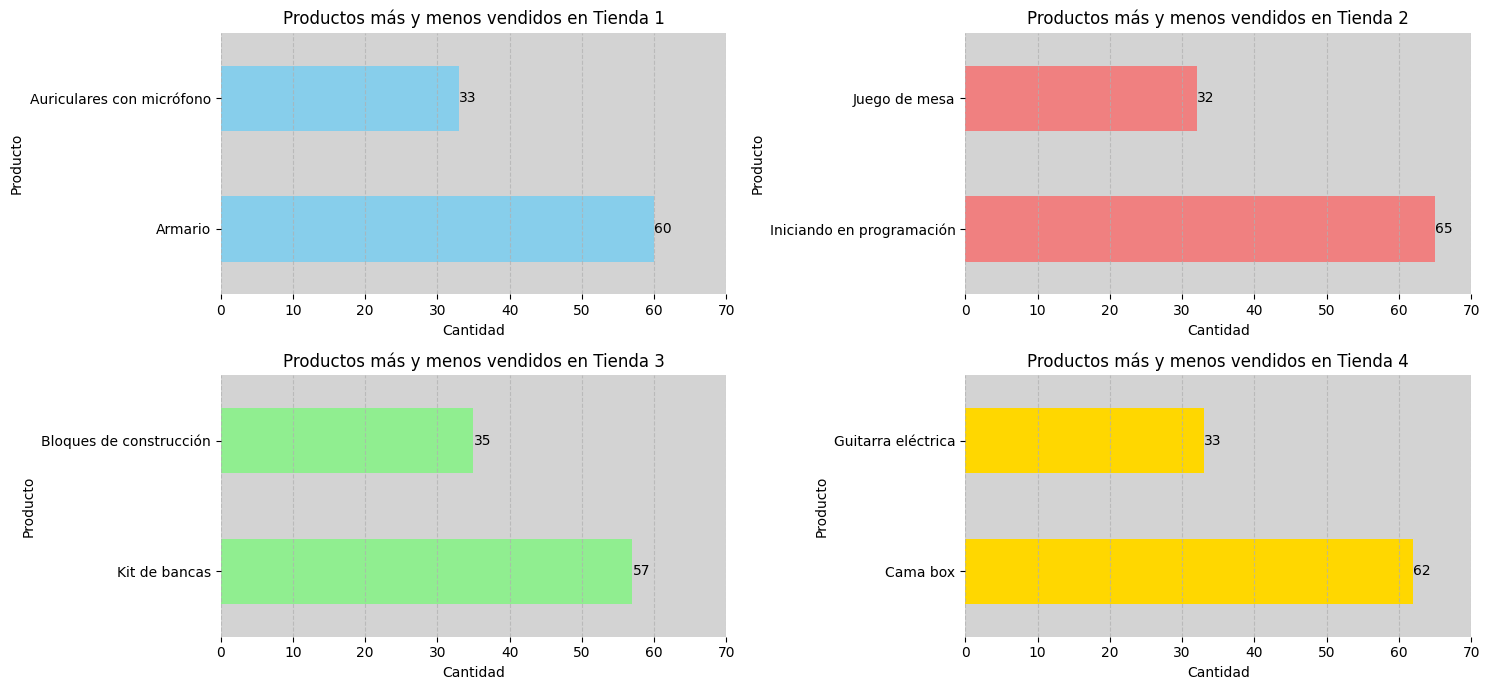

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres únicos de las tiendas del DataFrame consolidado
nombres_tiendas = df_productos_vendidos_por_tienda['Tienda'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
axes = axes.flatten() # Aplanar el arreglo de ejes para facilitar la iteración

# Colores para cada tienda (opcional, para mantener consistencia visual)
colors_by_store = {
    'Tienda 1': 'skyblue',
    'Tienda 2': 'lightcoral',
    'Tienda 3': 'lightgreen',
    'Tienda 4': 'gold'
}

# Bucle para procesar cada tienda y graficar
for i, nombres_tiendas in enumerate(nombres_tiendas):
    current_ax = axes[i]

    # Filtrar el DataFrame consolidado para la tienda actual
    tienda_para_plot = df_productos_vendidos_por_tienda[df_productos_vendidos_por_tienda['Tienda'] == nombres_tiendas]

    # Crear un DataFrame temporal para el trazado de esta tienda
    # Los nombres de los productos como índice y la Cantidad como columna
    dato_plot = tienda_para_plot.set_index('Producto')[['Cantidad']]

    # Trazar el gráfico de barras horizontal
    # Usamos el color específico de la tienda para el producto más vendido y 'firebrick' para el menos vendido
    dato_plot.plot(kind='barh', ax=current_ax, color=[colors_by_store[nombres_tiendas], 'firebrick'])

    # Configurar título y etiquetas
    current_ax.set_title(f'Productos más y menos vendidos en {nombres_tiendas}')
    current_ax.set_xlabel('Cantidad')
    current_ax.set_ylabel('Producto')
    current_ax.set_xlim(0, 70)
    current_ax.grid(axis='x', linestyle='--', alpha=0.7)
    current_ax.set_facecolor('lightgray')
    current_ax.tick_params(axis='x', colors='black')
    current_ax.tick_params(axis='y', colors='black')
    current_ax.spines['top'].set_visible(False)
    current_ax.spines['right'].set_visible(False)
    current_ax.spines['bottom'].set_visible(False)
    current_ax.spines['left'].set_visible(False)
    current_ax.legend().remove()
    for p in current_ax.patches:
        current_ax.annotate(f'{int(p.get_width())}',
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                           ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

## 5. Envío promedio por tienda

### En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [15]:
import pandas as pd

costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

df_costos_envio_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [costo_envio_promedio_tienda1,
                                 costo_envio_promedio_tienda2,
                                 costo_envio_promedio_tienda3,
                                 costo_envio_promedio_tienda4]
})

df_costos_envio_promedio['Costo de Envío Promedio'] = df_costos_envio_promedio['Costo de Envío Promedio'].round(2)
df_costos_envio_promedio

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


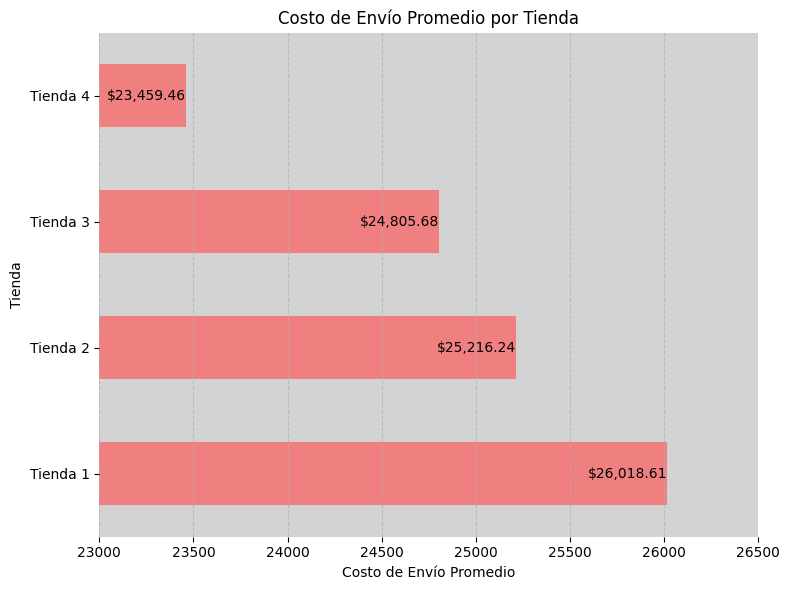

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Create a horizontal bar chart for average shipping costs
df_costos_envio_promedio.set_index('Tienda')['Costo de Envío Promedio'].plot(kind='barh', ax=ax, color='lightcoral')

# Set the title and labels
ax.set_title('Costo de Envío Promedio por Tienda')
ax.set_xlabel('Costo de Envío Promedio')
ax.set_ylabel('Tienda')

# Ajustar los límites del eje x para magnificar las diferencias
ax.set_xlim(23000, 26500) # Rango ajustado para visualizar mejor las diferencias

ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_facecolor('lightgray')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend().remove()

# Add data labels to each bar
for index, value in enumerate(df_costos_envio_promedio['Costo de Envío Promedio']):
    ax.text(value, index, f'${value:,.2f}', va='center', ha='right', color='black')

plt.tight_layout()
plt.savefig('costo_envio_promedio.png') # Guarda el gráfico como una imagen PNG
plt.show()

## **Análisis del desempeño geográfico**

### **Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.**

In [17]:
import pandas as pd

def calcular_distribucion_geografica_detallada(df, nombre_tienda):

    dist_venta_geo_detallado = df.groupby(['Lugar de Compra', 'lat', 'lon', 'Categoría del Producto'])['Producto'].count().reset_index(name='Cantidad de Ventas')
    dist_venta_geo_detallado['Tienda'] = nombre_tienda
    return dist_venta_geo_detallado


In [18]:
import pandas as pd

df_tienda1_geo = calcular_distribucion_geografica_detallada(tienda, 'Tienda 1')
df_tienda2_geo = calcular_distribucion_geografica_detallada(tienda2, 'Tienda 2')
df_tienda3_geo = calcular_distribucion_geografica_detallada(tienda3, 'Tienda 3')
df_tienda4_geo = calcular_distribucion_geografica_detallada(tienda4, 'Tienda 4')

df_ventas_geo_todas_tiendas = pd.concat([
                                              df_tienda1_geo, df_tienda2_geo,
                                              df_tienda3_geo, df_tienda4_geo
                                            ]).reset_index(drop=True)


mapeo_tiendas = df_ventas_geo_todas_tiendas
mapeo_tiendas.head()

,Lugar de Compra,lat,lon,Categoría del Producto,Cantidad de Ventas,Tienda
0,Armenia,4.53389,-75.68111,Artículos para el hogar,1,Tienda 1
1,Armenia,4.53389,-75.68111,Deportes y diversión,1,Tienda 1
2,Armenia,4.53389,-75.68111,Electrodomésticos,2,Tienda 1
3,Armenia,4.53389,-75.68111,Electrónicos,2,Tienda 1
4,Armenia,4.53389,-75.68111,Juguetes,3,Tienda 1


### **Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.**

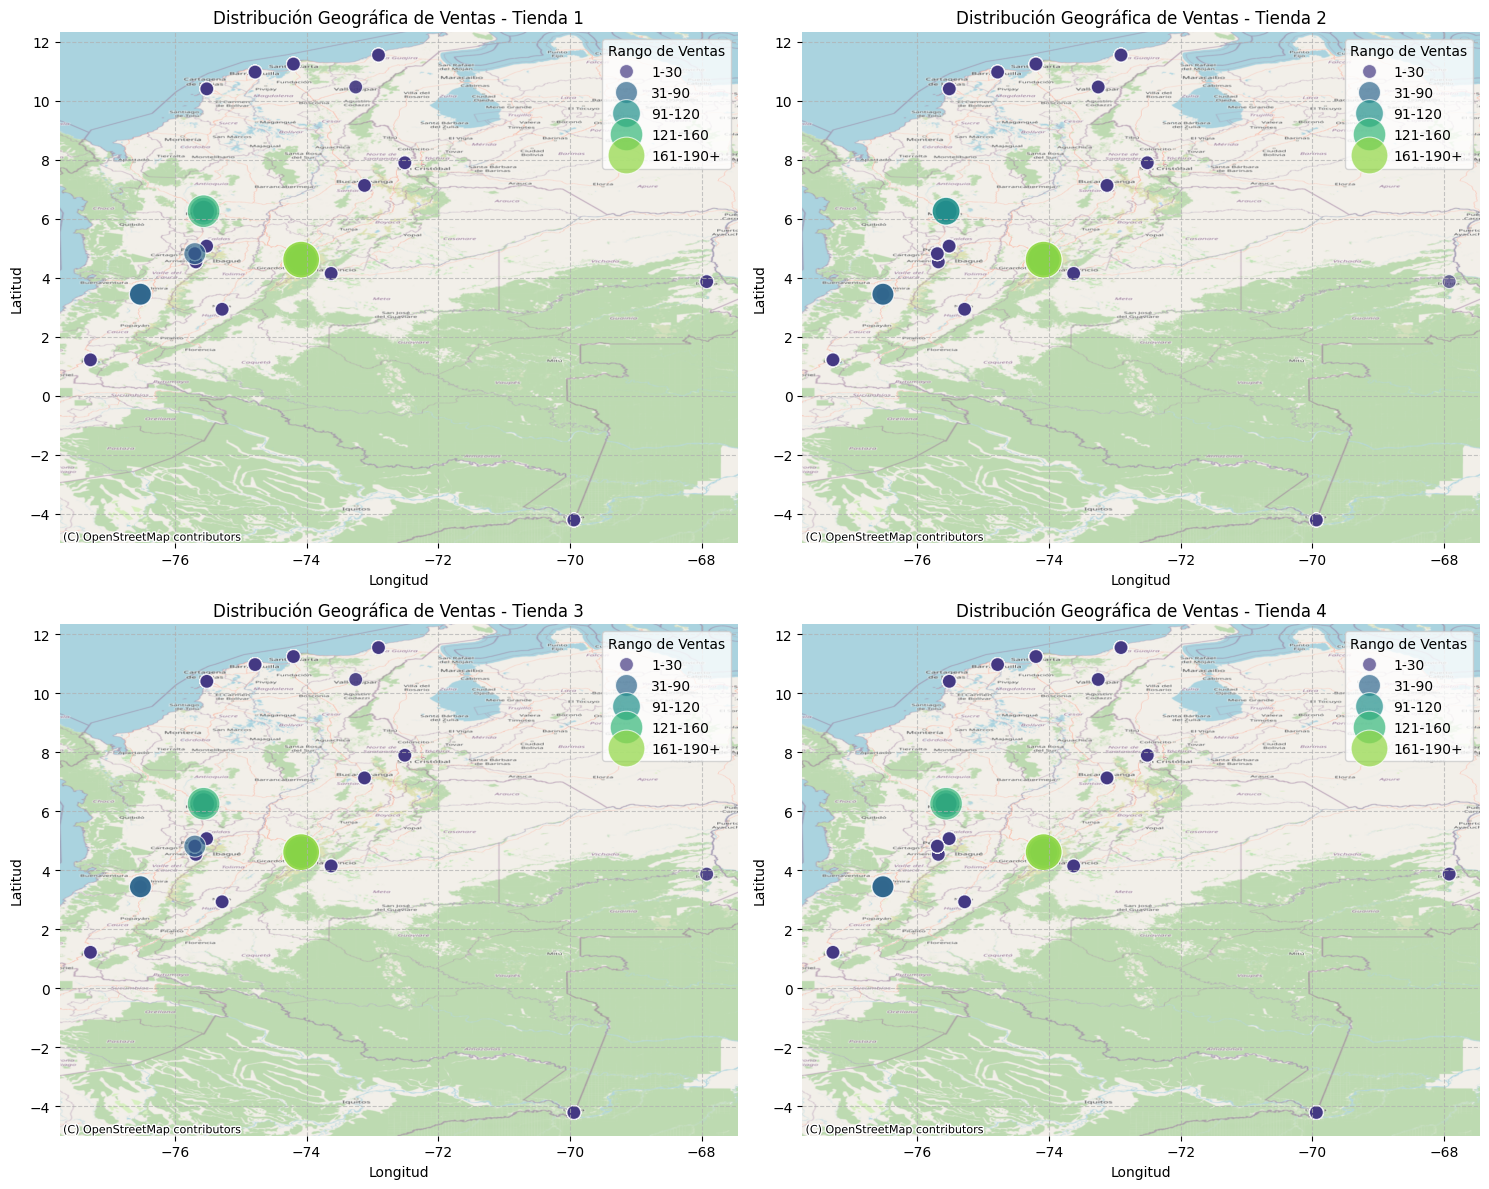

In [19]:
#!pip install contextily
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import contextily as cx

# Obtener los nombres únicos de las tiendas del DataFrame consolidado
nombres_tiendas = mapeo_tiendas['Tienda'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12)) # Crear una cuadrícula de 2x2 subplots
axes = axes.flatten() # Aplanar el arreglo de ejes para facilitar la iteración

# Bucle para procesar cada tienda y graficar
for i, nombre_tienda in enumerate(nombres_tiendas):
    current_ax = axes[i]

    # Filtrar el DataFrame consolidado para la tienda actual
    tienda_para_plot = mapeo_tiendas[mapeo_tiendas['Tienda'] == nombre_tienda].copy()

    # Ordenar el DataFrame por 'Cantidad de Ventas' de forma ascendente para dibujar los puntos pequeños encima
    tienda_para_plot = tienda_para_plot.sort_values(by='Cantidad de Ventas', ascending=True)

    # Definir los bins y etiquetas personalizados
    bins = [0, 30, 90, 120, 160, np.inf] # Rangos definidos por el usuario
    final_labels = ['1-30', '31-90', '91-120', '121-160', '161-190+'] # Etiquetas para esos rangos

    # Crear la nueva columna categórica 'Rango de Ventas'
    tienda_para_plot['Rango de Ventas'] = pd.cut(
        tienda_para_plot['Cantidad de Ventas'],
        bins=bins,
        labels=final_labels,
        right=True, # Incluir el lado derecho del bin
        include_lowest=True, # Incluir el valor más bajo
        ordered=True # Asegurar que las categorías estén ordenadas para que seaborn las mapee correctamente
    )

    # Crear un diccionario explícito para el mapeo de tamaños
    # Aseguramos que el primer label (menor rango) tenga el menor tamaño
    min_dot_size = 100
    max_dot_size = 700
    if len(final_labels) > 1:
        size_steps = np.linspace(min_dot_size, max_dot_size, len(final_labels))
    else:
        size_steps = [min_dot_size + (max_dot_size - min_dot_size) / 2] # Si solo una etiqueta, asignar tamaño medio

    size_dict = {label: size_steps[j] for j, label in enumerate(final_labels)}

    sns.scatterplot(
        data=tienda_para_plot,
        x='lon',
        y='lat',
        size='Rango de Ventas',    # Tamaño basado en los rangos de ventas
        hue='Rango de Ventas',     # Color basado en los rangos de ventas
        sizes=size_dict,           # Usar el diccionario de tamaños explícito
        alpha=0.7,                 # Ajustar la transparencia para ver el mapa de fondo
        palette='viridis',          # Usar la paleta 'viridis' que prefieres
        ax=current_ax,
        legend='full',
        hue_order=final_labels,    # Establecer explícitamente el orden para el color
        size_order=final_labels    # Establecer explícitamente el orden para el tamaño
    )

    current_ax.set_title(f'Distribución Geográfica de Ventas - {nombre_tienda}')
    current_ax.set_xlabel('Longitud')
    current_ax.set_ylabel('Latitud')
    current_ax.grid(True, linestyle='--', alpha=0.7)
    current_ax.set_facecolor('lightgray')
    current_ax.tick_params(axis='x', colors='black')
    current_ax.tick_params(axis='y', colors='black')
    current_ax.spines['top'].set_visible(False)
    current_ax.spines['right'].set_visible(False)
    current_ax.spines['bottom'].set_visible(False)
    current_ax.spines['left'].set_visible(False)
    current_ax.get_legend().set_title('Rango de Ventas')

    # Añadir mapa de fondo con contextily
    # Se ha cambiado 'Stamen.TonerLite' a 'OpenStreetMap.Mapnik' debido a la 'AttributeError: Stamen'
    cx.add_basemap(current_ax, crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.tight_layout()
plt.savefig('Distribución_Geográfica_Ventas.png') # Guarda el gráfico como una imagen PNG
plt.show()

### **Mapa ventas interactivo**

In [20]:
#!pip install folium
import folium
import numpy as np

# Define the bins and final_labels for the 'Sales Range' as previously established
bins = [0, 30, 90, 120, 160, np.inf]
final_labels = ['1-30', '31-90', '91-120', '121-160', '161-190+']

# Define a color map for the 'Sales Range' categories (e.g., using a viridis-like palette)
# Manually define a distinct color for each label for better visual differentiation
color_map = {
    '1-30': '#440154', # Dark purple
    '31-90': '#31688e', # Blue-purple
    '91-120': '#35b779', # Green
    '121-160': '#fde725', # Yellow
    '161-190+': '#d95f02' # Orange/Red
}

# Define a dictionary to map the final_labels to circle radius values
radius_dict = {
    '1-30': 5,
    '31-90': 8,
    '91-120': 11,
    '121-160': 14,
    '161-190+': 17
}

In [21]:
nombres_tiendas = mapeo_tiendas['Tienda'].unique()

for nombre_tienda in nombres_tiendas:
    tienda_para_plot = mapeo_tiendas[mapeo_tiendas['Tienda'] == nombre_tienda].copy()

    # Recalculate 'Rango de Ventas' to ensure consistency, as this was previously done for seaborn
    tienda_para_plot['Rango de Ventas'] = pd.cut(
        tienda_para_plot['Cantidad de Ventas'],
        bins=bins,
        labels=final_labels,
        right=True,
        include_lowest=True,
        ordered=True
    )

    # Ordenar el DataFrame por 'Cantidad de Ventas' de forma DESCENDENTE
    # para dibujar los puntos grandes primero y los pequeños encima
    tienda_para_plot = tienda_para_plot.sort_values(by='Cantidad de Ventas', ascending=False)

    # Calculate the average latitude and longitude for the map center
    avg_lat = tienda_para_plot['lat'].mean()
    avg_lon = tienda_para_plot['lon'].mean()

    # Create a Folium map centered on the store's sales locations
    current_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=7)

    # Add circle markers for each sales point
    for idx, row in tienda_para_plot.iterrows():
        rango_ventas = row['Rango de Ventas']
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=radius_dict.get(rango_ventas, 5), # Default radius if not found
            color=color_map.get(rango_ventas, '#808080'), # Default color if not found (grey)
            fill=True,
            fill_color=color_map.get(rango_ventas, '#808080'),
            fill_opacity=0.7,
            tooltip=f"""
                <b>Lugar de Compra:</b> {row['Lugar de Compra']}<br>
                <b>Categoría:</b> {row['Categoría del Producto']}<br>
                <b>Cantidad de Ventas:</b> {row['Cantidad de Ventas']}<br>
                <b>Rango de Ventas:</b> {rango_ventas}
            """
        ).add_to(current_map)

    print(f"### Mapa Interactivo de Ventas - {nombre_tienda}")
    display(current_map)

### Mapa Interactivo de Ventas - Tienda 1


### Mapa Interactivo de Ventas - Tienda 2


### Mapa Interactivo de Ventas - Tienda 3


### Mapa Interactivo de Ventas - Tienda 4


### **Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.**

# **Introducción del Informe**



El propósito de este informe es presentar un análisis detallado de las cuatro tiendas bajo consideración, con el fin de recomendar al Sr. Juan cuál de ellas posee el mayor potencial de venta y, por ende, representa la mejor oportunidad de inversión. Esta recomendación se fundamentará en una evaluación exhaustiva de métricas clave que abarcan diferentes aspectos operativos y de rendimiento de cada establecimiento.

Para llegar a una conclusión sólida, hemos examinado el **rendimiento financiero** mediante el análisis de los ingresos totales de cada tienda, lo cual nos proporciona una visión clara de su capacidad de generación de ingresos. La **satisfacción del cliente** se ha evaluado a través de las calificaciones promedio, un indicador directo de la calidad percibida y la experiencia del comprador. La **popularidad de los productos** se ha determinado mediante el análisis de las ventas por categoría y la identificación de los productos más y menos vendidos, lo que revela las preferencias del mercado y la eficiencia del inventario. Finalmente, la **eficiencia operativa** se ha medido a través de los costos de envío promedio, un factor crucial que impacta la rentabilidad y la logística.

Cada una de estas métricas es de vital importancia para la toma de decisiones del Sr. Juan. Los ingresos financieros dictan la viabilidad económica, la satisfacción del cliente asegura la lealtad y el crecimiento a largo plazo, la popularidad de los productos guía las estrategias de marketing y abastecimiento, y la eficiencia en los costos de envío optimiza los márgenes de ganancia. Un enfoque integral en estos pilares permitirá una recomendación bien fundamentada.

La estructura de este informe incluirá un análisis individual de cada una de las métricas mencionadas, presentando los hallazgos más relevantes. Concluiremos con una recomendación final justificada, destacando la tienda que mejor se alinea con los objetivos de potencial de venta y sostenibilidad.

## Analizar Ingresos Totales




In [22]:
df_ingresos_tienda_sorted = df_ingresos_tienda.sort_values(by='Ingresos totales', ascending=False)

mejor_desempeno = df_ingresos_tienda_sorted.iloc[0]
peor_desempeno = df_ingresos_tienda_sorted.iloc[-1]

mejor_tienda = mejor_desempeno.name
mejor_ingreso = mejor_desempeno['Ingresos totales']

peor_tienda = peor_desempeno.name
peor_ingreso = peor_desempeno['Ingresos totales']

print("### Resumen de Ingresos Totales por Tienda\n")
print(df_ingresos_tienda_sorted.style.format({'Ingresos totales': '{:,.0f}'}).to_string())
print(f"\nLa tienda con el mejor desempeño financiero es {mejor_tienda} con ingresos totales de ${mejor_ingreso:,.0f}.")
print(f"La tienda con el peor desempeño financiero es {peor_tienda} con ingresos totales de ${peor_ingreso:,.0f}.")

### Resumen de Ingresos Totales por Tienda

 Ingresos totales
Tienda 1 1,150,880,400
Tienda 2 1,116,343,500
Tienda 3 1,098,019,600
Tienda 4 1,038,375,700


La tienda con el mejor desempeño financiero es Tienda 1 con ingresos totales de $1,150,880,400.
La tienda con el peor desempeño financiero es Tienda 4 con ingresos totales de $1,038,375,700.


## Analizar Ventas por Categoría




### Análisis de Ventas por Categoría

Este análisis tiene como objetivo identificar los patrones de consumo y las fortalezas de inventario en cada una de las cuatro tiendas, examinando las categorías de productos más y menos vendidas. Utilizaremos dos DataFrames clave para este fin:

*   **`df_populares`**: Contiene el porcentaje de ventas de cada categoría por tienda, lo que nos permite entender la proporción relativa de cada categoría en el volumen total de ventas de la tienda.
*   **`df_tienda_categorias`**: Muestra el conteo absoluto de ventas para cada categoría por tienda, ofreciendo una visión del volumen real de productos vendidos.

Al comparar los resultados de ambos DataFrames, podremos obtener una imagen completa de qué categorías son consistentemente fuertes o débiles en cada tienda, y discutir las implicaciones para la estrategia de inventario y marketing.

In [23]:
print('### Categorías más y menos vendidas (por porcentaje) en cada tienda')

for col in df_populares.columns:
    store_name = col.replace('Mas_vendido_', '').replace('_', ' ').title()
    print(f'\n--- {store_name} ---\n')

    # Sort to find most and least popular categories
    sorted_categories = df_populares[col].sort_values(ascending=False)

    print('**Categorías Más Vendidas:**')
    print(sorted_categories.head(3).to_string())

    print('\n**Categorías Menos Vendidas:**')
    print(sorted_categories.tail(3).to_string())

### Categorías más y menos vendidas (por porcentaje) en cada tienda

--- Tienda 1 ---

**Categorías Más Vendidas:**
Categoría del Producto
Muebles         19.71
Electrónicos    18.99
Juguetes        13.73

**Categorías Menos Vendidas:**
Categoría del Producto
Instrumentos musicales     7.72
Libros                     7.33
Artículos para el hogar    7.25

--- Tienda 2 ---

**Categorías Más Vendidas:**
Categoría del Producto
Muebles         18.74
Electrónicos    17.89
Juguetes        13.27

**Categorías Menos Vendidas:**
Categoría del Producto
Instrumentos musicales     9.50
Libros                     8.35
Artículos para el hogar    7.67

--- Tienda 3 ---

**Categorías Más Vendidas:**
Categoría del Producto
Muebles         21.15
Electrónicos    19.12
Juguetes        13.35

**Categorías Menos Vendidas:**
Categoría del Producto
Libros                     7.84
Artículos para el hogar    7.50
Instrumentos musicales     7.50

--- Tienda 4 ---

**Categorías Más Vendidas:**
Categoría del Produc

## **Categoria de productos mas y menos vendidos en cada tienda.**

In [24]:
print('### Categorías más y menos vendidas (por conteo absoluto) en cada tienda')

for col in df_tienda_categorias.columns:
    store_name = col.replace('Ventas_', '').replace('_', ' ').title()
    print(f'\n--- {store_name} ---\n')

    # Sort to find most and least popular categories by count
    sorted_categories_count = df_tienda_categorias[col].sort_values(ascending=False)

    print('**Categorías Más Vendidas (Conteo):**')
    print(sorted_categories_count.head(3).to_string())

    print('\n**Categorías Menos Vendidas (Conteo):**')
    print(sorted_categories_count.tail(3).to_string())

### Categorías más y menos vendidas (por conteo absoluto) en cada tienda

--- Tienda 1 ---

**Categorías Más Vendidas (Conteo):**
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324

**Categorías Menos Vendidas (Conteo):**
Categoría del Producto
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171

--- Tienda 2 ---

**Categorías Más Vendidas (Conteo):**
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313

**Categorías Menos Vendidas (Conteo):**
Categoría del Producto
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181

--- Tienda 3 ---

**Categorías Más Vendidas (Conteo):**
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315

**Categorías Menos Vendidas (Conteo):**
Categoría del Producto
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177

--- Tienda 4 ---

**Categorías Más 

### Patrones de Consumo y Fortalezas de Inventario por Tienda

Al analizar los DataFrames  (porcentaje de ventas) y  (conteo absoluto de ventas), observamos patrones consistentes en las categorías de productos más y menos vendidas en todas las tiendas. Esta consistencia es crucial para identificar tendencias generales de mercado y fortalezas de inventario.

---
#### Tienda 1
*   **Categorías Más Vendidas:** Muebles (19.71%, 465 unidades), Electrónicos (18.99%, 448 unidades), Juguetes (13.73%, 324 unidades).
*   **Categorías Menos Vendidas:** Artículos para el hogar (7.25%, 171 unidades), Libros (7.33%, 173 unidades), Instrumentos musicales (7.72%, 182 unidades).
*   **Observaciones:** La Tienda 1 muestra un fuerte desempeño en Muebles y Electrónicos, que son consistentemente sus categorías principales tanto en porcentaje como en volumen. Los Juguetes también tienen una buena tracción. Las categorías de Artículos para el hogar, Libros e Instrumentos musicales son las menos populares, lo que podría indicar una baja demanda o una oferta inadecuada en estas áreas.

---
#### Tienda 2
*   **Categorías Más Vendidas:** Muebles (18.74%, 442 unidades), Electrónicos (17.89%, 422 unidades), Juguetes (13.27%, 313 unidades).
*   **Categorías Menos Vendidas:** Artículos para el hogar (7.67%, 181 unidades), Libros (8.35%, 197 unidades), Instrumentos musicales (9.50%, 224 unidades).
*   **Observaciones:** Similar a la Tienda 1, la Tienda 2 también destaca en Muebles y Electrónicos, con Juguetes en tercer lugar. Las categorías de bajo rendimiento son las mismas: Artículos para el hogar, Libros e Instrumentos musicales. Esto sugiere una tendencia general en el mercado o una oportunidad para optimizar el inventario en estas categorías de menor demanda.

---
#### Tienda 3
*   **Categorías Más Vendidas:** Muebles (21.15%, 499 unidades), Electrónicos (19.12%, 451 unidades), Juguetes (13.35%, 315 unidades).
*   **Categorías Menos Vendidas:** Instrumentos musicales (7.50%, 177 unidades), Artículos para el hogar (7.50%, 177 unidades), Libros (7.84%, 185 unidades).
*   **Observaciones:** La Tienda 3 presenta las mismas categorías más y menos vendidas que las tiendas anteriores, con Muebles y Electrónicos liderando claramente. Llama la atención que Instrumentos musicales y Artículos para el hogar tienen el mismo porcentaje y conteo de ventas en esta tienda, lo que las convierte en las menos populares. Esto refuerza el patrón de que estas tres categorías tienen un menor atractivo general.

---
#### Tienda 4
*   **Categorías Más Vendidas:** Muebles (20.36%, 480 unidades), Electrónicos (19.13%, 451 unidades), Juguetes (14.33%, 338 unidades).
*   **Categorías Menos Vendidas:** Instrumentos musicales (7.21%, 170 unidades), Libros (7.93%, 187 unidades), Artículos para el hogar (8.52%, 201 unidades).
*   **Observaciones:** La Tienda 4 sigue la misma tendencia, con Muebles y Electrónicos como categorías estrella, seguidas por Juguetes. Las categorías menos vendidas son de nuevo Instrumentos musicales, Libros y Artículos para el hogar. La consistencia en todas las tiendas es notable.

---
#### Patrones de Consumo Generales y Fortalezas/Oportunidades de Inventario

**Fortalezas Consistentes:**
*   **Muebles y Electrónicos:** Son las categorías consistentemente más fuertes en todas las tiendas, tanto en porcentaje como en conteo absoluto de ventas. Esto indica una alta demanda en el mercado para estos productos y representa una fortaleza clave en el inventario de todas las tiendas. Deberían seguir siendo el foco principal en términos de stock y marketing.
*   **Juguetes:** También muestran un rendimiento sólido, ocupando generalmente el tercer puesto en ventas para todas las tiendas. Esta categoría puede ser una fuente estable de ingresos.

**Áreas de Oportunidad/Debilidad:**
*   **Artículos para el hogar, Libros e Instrumentos musicales:** Estas tres categorías son consistentemente las menos vendidas en todas las tiendas. Esto podría indicar:
    *   **Baja Demanda:** Si la demanda del mercado es inherentemente baja para estos productos, las tiendas podrían considerar reducir el inventario o la variedad para evitar costos de almacenamiento excesivos.
    *   **Necesidad de Reevaluación:** Podría haber una oportunidad para revisar la oferta dentro de estas categorías (por ejemplo, tipos específicos de libros o instrumentos musicales) o implementar estrategias de marketing más agresivas para aumentar su atractivo. Es posible que el catálogo actual no resuene con los clientes.
    *   **Optimización de Inventario:** Reducir el stock de estas categorías de bajo rendimiento podría liberar capital y espacio para invertir en las categorías más exitosas, como Muebles y Electrónicos.

En resumen, las tiendas presentan una estructura de ventas por categoría muy similar. Las categorías de Muebles, Electrónicos y Juguetes son los pilares de ventas, mientras que Artículos para el hogar, Libros e Instrumentos musicales requieren una evaluación estratégica para mejorar su desempeño o ajustar el enfoque de inventario.

## Analizar Calificaciones Promedio de Clientes

Examinar las calificaciones promedio de los clientes por tienda, para evaluar la satisfacción general del cliente y la calidad percibida de cada establecimiento.


In [25]:
print('### Calificaciones Promedio por Tienda\n')
print(df_nota_promedio.to_string())

mejor_calificacion = df_nota_promedio['Calificacion'].max()
peor_calificacion = df_nota_promedio['Calificacion'].min()

mejor_tienda_calificacion = df_nota_promedio[df_nota_promedio['Calificacion'] == mejor_calificacion].index[0]
peor_tienda_calificacion = df_nota_promedio[df_nota_promedio['Calificacion'] == peor_calificacion].index[0]

print(f"\nLa tienda con la calificación promedio más alta es {mejor_tienda_calificacion} con {mejor_calificacion:.2f}.")
print(f"La tienda con la calificación promedio más baja es {peor_tienda_calificacion} con {peor_calificacion:.2f}.")

### Calificaciones Promedio por Tienda

          Calificacion
Tienda 1          3.98
Tienda 4          4.00
Tienda 2          4.04
Tienda 3          4.05

La tienda con la calificación promedio más alta es Tienda 3 con 4.05.
La tienda con la calificación promedio más baja es Tienda 1 con 3.98.


### Implicaciones de las Calificaciones Promedio por Tienda

Las calificaciones promedio de los clientes son un indicador directo de la satisfacción general y la calidad percibida de cada establecimiento. Al analizar los resultados:

*   **Tienda 3** tiene la calificación promedio más alta con **4.05**.
*   **Tienda 2** la sigue de cerca con **4.04**.
*   **Tienda 4** tiene una calificación de **4.00**.
*   **Tienda 1** tiene la calificación promedio más baja con **3.98**.

Aunque las diferencias en las calificaciones promedio entre las tiendas son relativamente pequeñas (todas se encuentran en un rango estrecho de 3.98 a 4.05), incluso pequeñas variaciones pueden ser significativas en la percepción del cliente y en un mercado competitivo. Una calificación más alta, aunque sea por una fracción, sugiere una mayor satisfacción del cliente y una percepción de mayor calidad.

#### Análisis detallado:

*   **Tienda 3 (4.05) y Tienda 2 (4.04):** Estas dos tiendas muestran la mayor satisfacción del cliente. Esto podría deberse a una mejor calidad de productos, un excelente servicio al cliente, procesos de entrega eficientes o una combinación de estos factores. Mantener y, si es posible, mejorar estas calificaciones es crucial para su éxito continuo y para fomentar la lealtad del cliente.

*   **Tienda 4 (4.00):** Se sitúa en un punto intermedio. Si bien una calificación de 4.00 es buena, hay un margen claro para aprender de las mejores prácticas de las Tiendas 2 y 3 para mejorar su puntuación y, en consecuencia, la satisfacción del cliente.

*   **Tienda 1 (3.98):** Aunque no es una calificación deficiente, al ser la más baja del grupo, indica que hay áreas de mejora. La Tienda 1 debería investigar las razones detrás de su puntuación ligeramente inferior. Esto podría implicar:
    *   **Análisis de comentarios:** Revisar los comentarios específicos de los clientes para identificar patrones de quejas o insatisfacción.
    *   **Mejora de productos o servicios:** Evaluar la calidad de sus productos o la eficacia de su servicio al cliente.
    *   **Procesos de entrega:** Si los costos de envío son un factor, la experiencia de entrega podría ser un área a optimizar.

**Implicaciones generales:**

La satisfacción del cliente es fundamental para el boca a boca positivo, la retención de clientes y el crecimiento a largo plazo. Una calificación promedio más alta no solo atrae a nuevos clientes, sino que también puede justificar precios más altos o fortalecer la marca. La Tienda 3, y en menor medida la Tienda 2, están en una posición favorable en este aspecto, mientras que la Tienda 1 tiene la mayor oportunidad de mejora para alinearse con sus competidores y maximizar su potencial de venta.

## Analizar Productos Más y Menos Vendidos


Identificar los productos específicos más y menos vendidos en cada tienda, utilizando los datos de `df_productos_vendidos_por_tienda`, para comprender la demanda de productos individuales.


In [26]:
print('### Productos más y menos vendidos en cada tienda\n')
display(df_productos_vendidos_por_tienda)

### Productos más y menos vendidos en cada tienda



,Tienda,Tipo,Producto,Cantidad
0,Tienda 1,Más Vendido,Armario,60
1,Tienda 1,Menos Vendido,Auriculares con micrófono,33
2,Tienda 2,Más Vendido,Iniciando en programación,65
3,Tienda 2,Menos Vendido,Juego de mesa,32
4,Tienda 3,Más Vendido,Kit de bancas,57
5,Tienda 3,Menos Vendido,Bloques de construcción,35
6,Tienda 4,Más Vendido,Cama box,62
7,Tienda 4,Menos Vendido,Guitarra eléctrica,33


### Resumen y Comparación de Productos Más y Menos Vendidos por Tienda

A continuación, se presenta un resumen de los productos más y menos vendidos en cada tienda, seguido de una comparación para identificar patrones y diferencias significativas.

---
#### Tienda 1
*   **Producto Más Vendido:** Armario (60 unidades)
*   **Producto Menos Vendido:** Auriculares con micrófono (33 unidades)
*   **Observaciones:** El Armario se destaca como el producto más popular, indicando una posible alta demanda de mobiliario. Los Auriculares con micrófono tienen las ventas más bajas, lo que podría sugerir menor interés o saturación del mercado para este artículo específico.

---
#### Tienda 2
*   **Producto Más Vendido:** Iniciando en programación (65 unidades)
*   **Producto Menos Vendido:** Juego de mesa (32 unidades)
*   **Observaciones:** Es interesante observar que un libro ("Iniciando en programación") es el producto más vendido, lo que podría indicar una demanda por contenido educativo o de desarrollo personal. El "Juego de mesa" es el menos vendido, similar a los patrones observados en categorías de juguetes.

---
#### Tienda 3
*   **Producto Más Vendido:** Kit de bancas (57 unidades)
*   **Producto Menos Vendido:** Bloques de construcción (35 unidades)
*   **Observaciones:** El "Kit de bancas" como producto más vendido sugiere una fortaleza en mobiliario o artículos para el hogar. Los "Bloques de construcción" son el menos vendido, alineándose con una menor demanda observada en la categoría de juguetes en general.

---
#### Tienda 4
*   **Producto Más Vendido:** Cama box (62 unidades)
*   **Producto Menos Vendido:** Guitarra eléctrica (33 unidades)
*   **Observaciones:** "Cama box" es el producto estrella, reforzando la tendencia de éxito en la categoría de muebles. La "Guitarra eléctrica" es el producto menos vendido, lo que coincide con la baja popularidad de la categoría de instrumentos musicales observada previamente.

---
### Comparación entre Tiendas:

**Patrones Consistentes (Fortalezas):**
*   **Muebles:** Productos de la categoría "Muebles" (Armario, Kit de bancas, Cama box) son consistentemente entre los más vendidos en Tiendas 1, 3 y 4. Esto refuerza que esta categoría es un pilar importante para el negocio.
*   **Demanda Específica:** La Tienda 2 destaca con "Iniciando en programación" como su producto más vendido, lo que podría indicar una oportunidad para explorar nichos de mercado relacionados con contenido educativo o tecnológico, aunque los datos generales de categoría mostraron que los libros no son una categoría fuerte. Este es un caso de un producto específico que sobresale en una categoría de bajo rendimiento general.

**Patrones Consistentes (Debilidades):**
*   **Juguetes e Instrumentos Musicales:** Los productos menos vendidos ("Juego de mesa", "Bloques de construcción", "Guitarra eléctrica") caen en las categorías de "Juguetes" e "Instrumentos Musicales", las cuales también fueron identificadas como las menos vendidas a nivel de categoría en el análisis anterior. Esto confirma una baja demanda o una oferta menos atractiva en estas áreas.
*   **Electrónica Específica:** En la Tienda 1, los "Auriculares con micrófono" fueron el menos vendido, lo cual es interesante ya que "Electrónicos" es una categoría fuerte en general. Esto sugiere que no todos los productos dentro de una categoría popular tienen el mismo rendimiento, y algunos artículos específicos pueden tener baja rotación.

**Implicaciones:**
*   **Optimización de Inventario:** Las tiendas deberían capitalizar la alta demanda de "Muebles" y considerar expandir la variedad o el stock de los productos más vendidos en esta categoría.
*   **Reevaluación de Productos de Bajo Rendimiento:** Es crucial revisar los productos menos vendidos. Para los "Juguetes" e "Instrumentos Musicales", esto podría implicar reducir el inventario, descontinuar ciertos artículos o buscar proveedores con productos más atractivos. Para productos específicos en categorías fuertes (como los auriculares en Tienda 1), se debería investigar la causa de su bajo rendimiento (precio, calidad, promoción) antes de tomar decisiones de descontinuación.
*   **Explorar Nichos:** El éxito del libro en la Tienda 2 sugiere que hay oportunidades para identificar productos de nicho que puedan tener un alto rendimiento, incluso si la categoría general no es la más fuerte.

## Analizar Costos de Envío Promedio

Revisar los costos de envío promedio por tienda, para evaluar el impacto logístico y el costo adicional para el cliente.


### Implicaciones del Costo de Envío Promedio por Tienda

El costo de envío promedio es una métrica crucial que afecta tanto la rentabilidad de la tienda como la experiencia del cliente. Un costo de envío más bajo puede hacer que una tienda sea más atractiva para los compradores y mejorar sus márgenes de ganancia si lo gestiona eficientemente.

Al analizar el los costos de envio:

* **Tienda 1:** tiene el costo de envío promedio más alto con **$26,018.61.**

* **Tienda 2:** la sigue con **$25,216.24.**

* **Tienda 3:** tiene un costo de **$24,805.68.**

* **Tienda 4:** tiene el costo de envío promedio más bajo con **$23,459.46.**

#### Análisis detallado:

*   **Tienda con el costo de envío más eficiente (Tienda 4):** Con un costo promedio de $23,459.46, la Tienda 4 demuestra la mayor eficiencia logística o tiene acuerdos de envío más favorables. Esto puede traducirse en una ventaja competitiva significativa, ya que puede ofrecer precios finales más atractivos a los clientes (si el costo se traslada) o retener un mayor margen de ganancia por venta.

*   **Tienda con el costo de envío menos eficiente (Tienda 1):** La Tienda 1, con el costo promedio más alto de $26,018.61, enfrenta un desafío logístico o tiene acuerdos de envío menos ventajosos. Esto podría impactar negativamente su competitividad, ya sea al tener que repercutir un mayor costo en el cliente final o al absorber una parte mayor del costo, reduciendo su rentabilidad.

#### Impacto logístico y costo adicional para el cliente:

*   **Impacto logístico:** Las diferencias en los costos de envío pueden deberse a varios factores: ubicación de los almacenes, eficiencia en las rutas de entrega, volumen de envíos que negocia tarifas más bajas, o la naturaleza de los productos enviados (tamaño, peso, fragilidad). Las tiendas con costos más altos podrían necesitar reevaluar sus socios logísticos, optimizar sus procesos de empaque y distribución, o incluso considerar la ubicación de sus centros de cumplimiento.

*   **Costo adicional para el cliente:** Si los costos de envío se trasladan al cliente, una tienda con costos más altos podría ver una reducción en sus tasas de conversión o un mayor abandono del carrito de compras. Los clientes son cada vez más sensibles a los costos de envío, y un costo adicional elevado puede ser un factor decisivo en su decisión de compra. La Tienda 4, al tener un costo de envío promedio más bajo, probablemente ofrece una propuesta de valor más atractiva para el cliente en este aspecto.

En conclusión, la **Tienda 4** destaca por su eficiencia en los costos de envío, lo que la posiciona favorablemente tanto en términos de rentabilidad como de atractivo para el cliente. La **Tienda 1**, por otro lado, debería investigar las causas de sus costos de envío más altos para identificar oportunidades de optimización y mejorar su competitividad.

## Sintetizar Hallazgos y Recomendar Tienda


Integrar todos los análisis previos (ingresos, categorías, calificaciones, productos, costos de envío) para formular una recomendación clara sobre a qué tienda debería vender el Sr. Juan, justificando la elección con las fortalezas y debilidades identificadas.


## Síntesis de Hallazgos y Recomendación

Este informe ha realizado un análisis exhaustivo de las cuatro tiendas
disponibles para el Sr. Juan, evaluando su rendimiento financiero, la satisfacción del cliente, los patrones de venta de productos y la eficiencia operativa a través de los costos de envío. A continuación, se presenta un resumen de las fortalezas y debilidades de cada tienda, seguido de una comparación y la recomendación final.

---
### Resumen por Tienda

#### Tienda 1
*   **Fortalezas:**
    *   **Mayores Ingresos Totales:** Con $1,150,880,400, la Tienda 1 es la que más ingresos ha generado, lo que indica un fuerte volumen de ventas o productos de alto valor. Esta es una señal clara de un buen desempeño comercial.
    *   **Categorías Líderes:** Muebles (19.71%) y Electrónicos (18.99%) son las categorías más vendidas, demostrando una alta demanda y un inventario bien gestionado en estos segmentos.
*   **Debilidades:**
    *   **Calificación Promedio Más Baja:** Con 3.98, es la tienda con la calificación promedio más baja, sugiriendo un margen de mejora en la satisfacción del cliente, calidad del producto o servicio.
    *   **Costo de Envío Promedio Más Alto:** El costo de envío promedio de $26,018.61 es el más elevado, lo que podría impactar la competitividad de sus precios finales o reducir los márgenes de ganancia.
    *   **Productos Menos Vendidos:** 'Auriculares con micrófono' es su producto menos vendido individualmente, lo que puede requerir una reevaluación del inventario o estrategias de marketing.

#### Tienda 2
*   **Fortalezas:**
    *   **Altos Ingresos Totales:** Ocupa el segundo lugar en ingresos con $1,116,343,500, lo que demuestra un rendimiento financiero muy sólido.
    *   **Buena Calificación Promedio:** Con 4.04, presenta la segunda calificación más alta, indicando una buena satisfacción del cliente.
    *   **Categorías Consistentes:** Similar a la Tienda 1, Muebles (18.74%) y Electrónicos (17.89%) son sus categorías más fuertes.
*   **Debilidades:**
    *   **Costo de Envío Promedio:** Aunque no es el más alto, $25,216.24 es el segundo costo de envío más elevado.
    *   **Producto Menos Vendido:** 'Juego de mesa' es el producto individual menos vendido, lo que podría ser un punto a revisar.

#### Tienda 3
*   **Fortalezas:**
    *   **Calificación Promedio Más Alta:** Con 4.05, la Tienda 3 demuestra la mayor satisfacción del cliente, un indicador clave de calidad y lealtad a largo plazo.
    *   **Menor Costo de Envío Promedio:** Su costo de envío promedio de $24,805.68 es el segundo más bajo, lo que contribuye a una mayor eficiencia operativa.
    *   **Categorías Fuertes:** Destaca en Muebles (21.15%) y Electrónicos (19.12%), incluso superando a las otras tiendas en la proporción de ventas de Muebles.
*   **Debilidades:**
    *   **Tercer Puesto en Ingresos:** Con $1,098,019,600, sus ingresos son inferiores a los de la Tienda 1 y 2, aunque sigue siendo un buen desempeño.
    *   **Producto Menos Vendido:** 'Bloques de construcción' es el menos vendido, lo que sugiere un ajuste de inventario.

#### Tienda 4
*   **Fortalezas:**
    *   **Costo de Envío Promedio Más Bajo:** Con $23,459.46, tiene el costo de envío más eficiente, lo que optimiza sus márgenes y la hace más competitiva en precios finales.
    *   **Calificación Promedio Sólida:** Una calificación de 4.00 es respetable, indicando una buena base de satisfacción del cliente.
    *   **Categorías Fuertes:** Muebles (20.36%) y Electrónicos (19.13%) también son sus categorías dominantes.
*   **Debilidades:**
    *   **Ingresos Totales Más Bajos:** Es la tienda con los ingresos totales más bajos ($1,038,375,700), lo que podría indicar una menor escala de operaciones o menor demanda general.
    *   **Producto Menos Vendido:** 'Guitarra eléctrica' es su producto individual menos vendido.

---
### Comparación Final y Recomendación

Al integrar todos los análisis, observamos que las cuatro tiendas comparten fortalezas en las categorías de Muebles y Electrónicos y debilidades en categorías como Instrumentos musicales, Libros y Artículos para el hogar. Sin embargo, las diferencias en ingresos, calificaciones y costos de envío son clave para la decisión del Sr. Juan.

*   La **Tienda 1** lidera en ingresos, pero tiene la calificación más baja y
    sel coto de envío más alto, lo que sugiere un potencial conflicto entre volumen y satisfacción/eficiencia.
*   La **Tienda 4** es la más eficiente en costos de envío y tiene una
    calificación decente, pero sus ingresos son los más bajos, lo que podría implicar un menor alcance o mercado.
*   Las **Tiendas 2 y 3** se sitúan en un punto intermedio, con buen
    rendimiento en varias métricas.

Considerando un enfoque en el **potencial de venta**, que implica no solo altos ingresos sino también una base sólida de clientes satisfechos y una eficiencia operativa, la **Tienda 3** emerge como la opción más equilibrada y prometedora para el Sr. Juan.

#### Recomendación al Sr. Juan: **Tienda 3**

**Justificación:**
La Tienda 3 ofrece el **mejor equilibrio** entre los factores clave de éxito:
1.  **Alta Satisfacción del Cliente (4.05):** La calificación promedio más alta indica una base de clientes leales y un boca a boca positivo, crucial para el crecimiento sostenible y la capacidad de atraer nuevos compradores. La satisfacción del cliente es un motor directo del potencial de venta a largo plazo.

2. Eficiencia Operativa: Posee el segundo costo de envío promedio más bajo
($24,805.68),lo que mejora la rentabilidad y lacompetitividad en el mercado.

3. Sólidos Ingresos y Categorías Líderes: Aunque no tiene los ingresos más altos, sus ingresos de $1,098,019,600 son muy competitivos, y su dominio en Muebles (21.15%) y Electrónicos (19.12%) muestra una excelente sintonía con la demanda del mercado.

**Estrategias para Capitalizar las Fortalezas de la Tienda 3:**
*   **Fidelización y Referencias:** Invertir en programas de fidelización y solicitudes de referencias para aprovechar su alta satisfacción del cliente.
*   **Optimización de Inventario:** Mantener el enfoque en las categorías de Muebles y Electrónicos, asegurando un stock adecuado y una rotación eficiente.
*   **Revisión de Categorías Débiles:** Investigar las razones detrás del bajo rendimiento de 'Bloques de construcción' y otras categorías menos vendidas (Instrumentos musicales, Artículos para el hogar, Libros). Podría ser una oportunidad para introducir nuevos productos, ajustar precios o reducir inventario para liberar capital.

**Consideraciones para el Futuro:**
Aunque la Tienda 3 presenta el mejor perfil general, el Sr. Juan también podría considerar las lecciones aprendidas de las otras tiendas:
*   **Tienda 1:** Podría servir como un caso de estudio para alcanzar volúmenes de ingresos aún mayores, analizando sus estrategias de marketing y volumen de transacciones, mientras se enfoca en mejorar la satisfacción del cliente y la eficiencia logística.
*   **Tienda 4:** Ofrece un modelo de costos de envío altamente eficiente que podría ser replicado o estudiado para identificar las mejores prácticas aplicables a la Tienda 3.

En conclusión, la Tienda 3 no solo muestra un buen desempeño actual, sino que también ofrece el mayor potencial de crecimiento y una base sólida para la inversión del Sr. Juan, dada su excelente satisfacción del cliente y eficiencia operativa.

## Análisis Visual de Patrones Geográficos


Revisar los mapas de ventas (tanto los estáticoscomo los interactivos) para identificar visualmente áreas de alta y baja concentración de ventas para cada tienda. Prestar especial atención a si alguna tienda domina ciertas regiones o si hay 'puntos calientes' de ventas que se repiten en varias tiendas.


### Análisis de Patrones Geográficos de Ventas

Al revisar los gráficos de dispersión estáticos generados y los mapas interactivos para cada tienda, se pueden identificar los siguientes patrones y concentraciones de ventas:

---
#### Observaciones Generales en los Mapas Estáticos :
*   **Concentración en Grandes Ciudades:** En todas las tiendas, los puntos más grandes y de colores cálidos (indicando altos rangos de ventas) tienden a agruparse en las principales ciudades colombianas. **Bogotá**, **Medellín**, **Cali** y **Barranquilla** aparecen consistentemente como centros de alta actividad de ventas para todas las tiendas.
*   **Variedad de Categorías en Puntos Calientes:** En estos centros urbanos, no solo hay un gran volumen de ventas, sino que estas ventas abarcan una amplia gama de categorías de productos, como se evidencia por la mezcla de colores de los puntos, lo que sugiere una demanda diversificada.
*   **Rangos de Ventas:** Los puntos con los rangos de ventas más altos (colores amarillo-blanco en la paleta 'viridis') son predominantes en las ciudades mencionadas, mientras que los rangos bajos (púrpura-azul oscuro) se encuentran más dispersos o en ciudades con menor actividad general.

---
#### Observaciones Adicionales en los Mapas Interactivos :
*   Los mapas confirman la distribución observada en los gráficos estáticos. Al hacer clic en los marcadores, se puede verificar la categoría y la cantidad exacta de ventas en cada "Lugar de Compra". Esto es especialmente útil para ver cómo se desglosan las ventas en ubicaciones con múltiples puntos cercanos.
*   Se observa que incluso dentro de una misma ciudad, diferentes categorías de productos pueden tener concentraciones variadas. Por ejemplo, en Bogotá, puede haber múltiples puntos, y al explorarlos, se revelan diferentes productos y sus respectivos volúmenes de venta.

---
#### Comparación entre Tiendas y Dominio Regional:
*   **Ninguna Tienda Domina una Región Exclusivamente:** No hay evidencia clara de que una tienda en particular domine una región geográfica específica de manera exclusiva. Todas las tiendas parecen tener una presencia de ventas distribuida de manera similar en los principales centros urbanos.
*   **Diferencias en Volumen Total:** Aunque la distribución es similar, el volumen total de ventas (como se vio en el análisis de ingresos) sugiere que **Tienda 1** y **Tienda 2** tienen una mayor cantidad de transacciones o transacciones de mayor valor, lo que se traduce en más o mayores puntos de venta en general en los mapas, pero sin un dominio geográfico exclusivo.

---
#### Identificación de 'Puntos Calientes' de Ventas:
*   Los 'puntos calientes' son de manera inequívoca las grandes ciudades: **Bogotá, Medellín, Cali, Barranquilla**. Estas ciudades muestran un volumen consistentemente alto de ventas para todas las tiendas. Esto sugiere que estas son las áreas con mayor densidad de población y poder adquisitivo, o donde la logística de entrega es más eficiente.
*   Otros centros urbanos de menor tamaño, como **Bucaramanga, Cartagena, Pasto, Cúcuta** y **Pereira**, también presentan puntos de ventas significativos, aunque con menor frecuencia o volumen que los 'puntos calientes' principales.

---
#### Áreas con Baja Concentración de Ventas:
*   Las áreas con baja concentración de ventas o puntos pequeños (indicando pocos productos vendidos) son generalmente ciudades más pequeñas o ubicaciones menos densamente pobladas, como **Inírida, Leticia, San Andrés** y **Villavicencio**. Esto es esperable debido a la menor población y, posiblemente, a desafíos logísticos que aumentan los costos de envío (como se vio en el análisis de costos de envío).
*   En estas ubicaciones de bajo volumen, las ventas suelen ser para un rango limitado de categorías, y los puntos son más pequeños, indicando rangos de ventas bajos (1-30).

---
#### Patrones Geográficos y Su Influencia en el Rendimiento:
*   El rendimiento de las tiendas parece estar directamente correlacionado con la densidad de población y la actividad económica de las ciudades. Las tiendas con mayores ingresos tienden a tener una mayor presencia de puntos de venta de alto rango en los 'puntos calientes'.
*   La uniformidad en la distribución geográfica de ventas entre las tiendas sugiere que, en general, todas las tiendas están sirviendo a un mercado similar y están aprovechando las mismas áreas de alta demanda. Esto implica que la diferenciación en el rendimiento (ingresos, calificaciones) podría estar más relacionada con factores internos (gestión de inventario, servicio al cliente, eficiencia logística) que con un dominio geográfico particular.

## Identificación de Tiendas con Rendimiento Superior/Inferior por Región


Describir qué tiendas parecen tener un rendimiento superior o inferior (más ventas, rangos más altos) en ciertas ciudades o regiones, y cuáles tienen un rendimiento inferior, basándose en los análisis visuales y los datos de rendimiento general previamente calculados.


In [27]:
ventas_por_ciudad_tienda = df_ventas_geo_todas_tiendas.groupby(['Tienda', 'Lugar de Compra'])['Cantidad de Ventas'].sum().reset_index()

hot_spots = ['Bogotá', 'Medellín', 'Cali', 'Barranquilla']
ventas_hot_spots = ventas_por_ciudad_tienda[ventas_por_ciudad_tienda['Lugar de Compra'].isin(hot_spots)]

# Pivot the table for easier comparison
ventas_pivot = ventas_hot_spots.pivot_table(index='Lugar de Compra', columns='Tienda', values='Cantidad de Ventas', fill_value=0)

print("### Ventas por Tienda en los 'Puntos Calientes' (Hot Spots)\n")
display(ventas_pivot.style.format('{:,.0f}'))

### Ventas por Tienda en los 'Puntos Calientes' (Hot Spots)



Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Lugar de Compra,,,,
Barranquilla,75,78,77,80
Bogotá,984,985,983,991
Cali,283,222,248,254
Medellín,563,594,580,577


### Identificación de Tiendas con Rendimiento Superior/Inferior por Región

Al integrar el análisis visual de los mapas de ventas (estáticos e interactivos) con los datos cuantitativos de ventas en los 'puntos calientes' y los ingresos totales por tienda, podemos describir el desempeño regional de cada establecimiento:

---
#### Observaciones Clave de ventas y Mapas:
El DataFrame nos proporciona una visión granular de las ventas por tienda en las cuatro principales ciudades de Colombia:

| Lugar de Compra | Tienda 1 | Tienda 2 | Tienda 3 | Tienda 4 |
|-----------------|----------|----------|----------|----------|
| Barranquilla    | 75       | 78       | 77       | 80       |
| Bogotá          | 984      | 985      | 983      | 991      |
| Cali            | 283      | 222      | 248      | 254      |
| Medellín        | 563      | 594      | 580      | 577      |

---
#### Análisis de Rendimiento Regional por Tienda:

*   **Bogotá:** Esta ciudad es consistentemente el 'punto caliente' más grande para todas las tiendas, con volúmenes de ventas cercanos a las 1000 unidades. La **Tienda 4** muestra un ligero liderazgo con 991 ventas, seguida de cerca por la **Tienda 2** (985) y la **Tienda 1** (984). La **Tienda 3** tiene 983 ventas, siendo la de menor volumen en la capital, aunque las diferencias son marginales.

*   **Medellín:** La **Tienda 2** domina ligeramente en Medellín con 594 ventas, seguida por la **Tienda 4** (577) y la **Tienda 3** (580). La **Tienda 1** registra 563 ventas, lo que la posiciona en el último lugar en esta ciudad. Este patrón contrasta con el rendimiento general de ingresos de la Tienda 1, sugiriendo que su éxito se basa en otras regiones o una distribución de ventas más equitativa.

*   **Cali:** La **Tienda 1** lidera de manera más marcada en Cali con 283 ventas, destacándose sobre las otras tiendas. La **Tienda 4** sigue con 254, la **Tienda 3** con 248, y la **Tienda 2** presenta el rendimiento más bajo con 222 ventas. Esto muestra una fortaleza regional específica para la Tienda 1 en Cali.

*   **Barranquilla:** Similar a Cali, la **Tienda 4** se destaca ligeramente en Barranquilla con 80 ventas, seguida de cerca por la **Tienda 2** (78) y la **Tienda 3** (77). La **Tienda 1** es la de menor rendimiento con 75 ventas. Las diferencias en esta ciudad son mínimas, indicando una distribución de ventas bastante pareja.

---
#### Patrones de Dominio Regional y Puntos Calientes:

1.  **Uniformidad en Ciudades Grandes:** En general, todas las tiendas tienen una fuerte presencia en los 'puntos calientes' de Bogotá, Medellín, Cali y Barranquilla. Estos patrones geográficos influyen directamente en el rendimiento, ya que estas ciudades concentran la mayor actividad económica y poblacional, lo que se traduce en un alto volumen de ventas para todas las tiendas.

2.  **Ligeras Ventajas Regionales:** Aunque no hay un dominio regional exclusivo de una sola tienda, se observan ligeras ventajas:
    *   La **Tienda 1** muestra un rendimiento superior en **Cali**, lo que podría contribuir a sus altos ingresos generales a pesar de un rendimiento más modesto en Medellín y Barranquilla.
    *   La **Tienda 2** es marginalmente superior en **Medellín** y **Bogotá**, aunque por poco margen.
    *   La **Tienda 4** tiene una ligera ventaja en **Bogotá** y **Barranquilla**.

3.  **Correlación con Ingresos Totales:** La **Tienda 1**, que tiene los ingresos totales más altos, no necesariamente domina todas las ciudades individualmente. Su fortaleza parece venir de un desempeño robusto en varias ciudades, especialmente en Cali, y posiblemente una distribución más amplia de ventas en ciudades más pequeñas o en un mayor valor de sus productos (como se vio en el análisis de ingresos).

4.  **Desempeño Inferior en Ciudades Específicas:** La **Tienda 2** tiene el rendimiento más bajo en Cali, mientras que la **Tienda 1** lo tiene en Medellín y Barranquilla (aunque por poco). Estas tiendas podrían investigar las causas de estas menores ventas en esas ubicaciones específicas, como estrategias de marketing local, competencia, o problemas logísticos.

En resumen, si bien todas las tiendas se benefician de la alta demanda en las grandes ciudades, existen diferencias sutiles en su rendimiento regional que, combinadas con otros factores como la satisfacción del cliente y la eficiencia de costos, determinan su desempeño general.

## Discusión sobre Posibles Patrones Geográficos

Explorar si existen patrones geográficos que puedan influir en el rendimiento. Por ejemplo, ¿las ventas se concentran en grandes ciudades, o hay regiones específicas donde ciertos productos tienen más éxito? ¿Hay ciudades donde todas las tiendas tienen un rendimiento bajo o alto?


### Análisis de Patrones Geográficos de Ventas y Rendimiento Regional

Al integrar el análisis visual de los mapas con los datos cuantitativos de ventas, podemos extraer patrones geográficos clave y su influencia en el rendimiento de cada tienda.

---
#### 1. Resumen de Patrones Geográficos Clave
*   **Concentración Urbana General:** Todas las tiendas muestran una clara concentración de ventas en las principales ciudades colombianas. Los puntos de mayor tamaño y colores cálidos en los mapas (indicando altos volúmenes de venta) se agrupan consistentemente en estos centros urbanos.
*   **Demanda Divergente:** Fuera de los "puntos calientes", las ventas son más dispersas y de menor volumen, con puntos más pequeños y colores más fríos. Esto sugiere que las áreas rurales o menos pobladas contribuyen menos al volumen general de ventas de todas las tiendas.
*   **Consistencia entre Tiendas:** La distribución geográfica de las ventas es notablemente similar entre las cuatro tiendas, lo que indica que todas están operando en el mismo mercado geográfico principal.

---
#### 2. Concentración de Ventas en Grandes Ciudades ('Puntos Calientes')
Las grandes ciudades actúan como "puntos calientes" de ventas para **todas las tiendas** sin excepción. La tabla `ventas_pivot` lo confirma:

| Lugar de Compra | Tienda 1 | Tienda 2 | Tienda 3 | Tienda 4 |
|-----------------|----------|----------|----------|----------|
| Barranquilla    | 75       | 78       | 77       | 80       |
| Bogotá          | 984      | 985      | 983      | 991      |
| Cali            | 283      | 222      | 248      | 254      |
| Medellín        | 563      | 594      | 580      | 577      |

*   **Bogotá** es, por lejos, el "punto caliente" más significativo, con un volumen de ventas cercano a las 1000 unidades para cada tienda. Le siguen **Medellín**, **Cali** y **Barranquilla** en importancia.
*   Esta concentración se explica por la mayor densidad de población, el poder adquisitivo y la infraestructura logística que facilitan las entregas en estas áreas metropolitanas. La eficiencia y la demanda en estas ciudades son cruciales para el rendimiento global de todas las tiendas.

---
#### 3. Éxito de Categorías de Productos en Regiones Específicas
Basándonos enlas tiendas y la interacción con las ventas en los mapas, observamos:
*   **Éxito Generalizado de Muebles y Electrónicos:** Las categorías de "Muebles" y "Electrónicos", identificadas como las más vendidas en el análisis anterior, muestran una fuerte presencia y volumen en casi todos los "puntos calientes". Por ejemplo, al explorar los marcadores en Bogotá o Medellín, se encuentran con frecuencia ventas elevadas de productos de estas categorías para todas las tiendas.
*   **Patrones de Nicho Menos Evidentes Regionalmente:** Aunque se pueden identificar ventas individuales de otras categorías en diversas ciudades, no hay una evidencia clara de que una categoría "débil" (como Instrumentos musicales o Libros) sobresalga significativamente en una región específica para *todas* las tiendas o de manera consistente. Su presencia es más dispersa y de menor volumen incluso en las grandes ciudades. Esto sugiere que el éxito de categorías es más universal por su tipo de producto que por su preferencia regional.

---
#### 4. Ciudades con Rendimiento Consistentemente Alto o Bajo para Todas las Tiendas
*   **Rendimiento Consistentemente Alto:** Como se muestra en la tabla de ventas, **Bogotá** y **Medellín** son consistentemente las ciudades con el mayor volumen de ventas para todas las tiendas. Prácticamente todas las tiendas tienen sus picos de ventas en estas ciudades. Esto se debe a que son los centros económicos y demográficos más grandes del país. Las diferencias entre tiendas en estas ciudades son mínimas, lo que indica que todas las tiendas están capitalizando la alta demanda existente.

*   **Rendimiento Consistentemente Bajo:** Fuera de los "puntos calientes", ciudades como **Inírida, Leticia, San Andrés** y **Villavicencio** (observado en los mapas interactivos y en la vista general de tiendas) muestran un rendimiento consistentemente bajo para todas las tiendas. Las posibles razones incluyen:
    *   **Menor Densidad Demográfica:** Menos población implica menos clientes potenciales.
    *   **Desafíos Logísticos:** Estas regiones pueden tener mayores costos de envío o tiempos de entrega más largos, lo que desincentiva las compras o aumenta los gastos operativos.
    *   **Menor Poder Adquisitivo:** Algunas de estas regiones podrían tener un menor poder adquisitivo promedio, lo que limita el gasto en productos de las tiendas.

En conclusión, los patrones geográficos muestran un mercado de consumo fuertemente centralizado en las grandes ciudades. Las tiendas no muestran un dominio regional exclusivo, lo que implica que el éxito o fracaso de una tienda se debe más a factores internos de gestión (precios, servicio, marketing, eficiencia logística) que a una ventaja geográfica inherente. La estrategia para el Sr. Juan debe enfocarse en maximizar la presencia y eficiencia en los "puntos calientes" y evaluar la viabilidad de expandir o mantener operaciones en áreas de bajo rendimiento.

## Relación con Métricas de Rendimiento General


Relacionar los hallazgos geográficos con las métricas de rendimiento general de cada tienda (ingresos totales, calificación promedio, etc.) previamente analizadas, para ofrecer una imagen más completa de su desempeño.


In [28]:
print('### Resumen de Métricas de Rendimiento General y Ventas en Puntos Calientes\n')

print('#### Ingresos Totales por Tienda:')
display(df_ingresos_tienda_sorted.style.format({'Ingresos totales': '{:,.0f}'}))

print('\n#### Calificaciones Promedio por Tienda:')
display(df_nota_promedio)

print('\n#### Costos de Envío Promedio por Tienda:')
display(df_costos_envio_promedio)

print('\n#### Ventas por Tienda en los \'Puntos Calientes\' (Hot Spots):')
display(ventas_pivot.style.format('{:,.0f}'))

### Resumen de Métricas de Rendimiento General y Ventas en Puntos Calientes

#### Ingresos Totales por Tienda:


,Ingresos totales
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"



#### Calificaciones Promedio por Tienda:


,Calificacion
Tienda 1,3.98
Tienda 4,4.00
Tienda 2,4.04
Tienda 3,4.05



#### Costos de Envío Promedio por Tienda:


,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46



#### Ventas por Tienda en los 'Puntos Calientes' (Hot Spots):


Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Lugar de Compra,,,,
Barranquilla,75,78,77,80
Bogotá,984,985,983,991
Cali,283,222,248,254
Medellín,563,594,580,577


### Relación de Hallazgos Geográficos con Métricas de Rendimiento General

Al integrar el análisis geográfico de ventas con las métricas de rendimiento general de cada tienda (ingresos totales, calificación promedio y costos de envío promedio), podemos obtener una imagen más completa de su desempeño y entender cómo la distribución espacial de las ventas influye en los resultados.

---
#### 1. Influencia de la Concentración de Ventas en Grandes Ciudades en los Ingresos Totales:

Como se observó en el análisis geográfico, las grandes ciudades como **Bogotá, Medellín, Cali y Barranquilla** son consistentemente los "puntos calientes" de ventas para todas las tiendas. La concentración de un alto volumen de ventas en estas metrópolis tiene un impacto directo y significativo en los ingresos totales de cada tienda.

*   **Tienda 1** tiene los ingresos totales más altos $1,150,880,400. Aunque no domina en todas las ciudades individualmente, tiene una fuerte presencia general y lidera en Cali. Esto sugiere que su estrategia de ventas en estos "puntos calientes", combinada con su rendimiento en otras ciudades de menor volumen o el valor unitario de sus productos, le permite alcanzar la cima en ingresos.

* Las **Tiendas 2 y 3** también muestran altos ingresos totales ($1,116,343,500) y ($1,098,019,600) respectivamente, lo cual es coherente con su fuerte presencia en las principales ciudades. Por ejemplo, la Tienda 2 lidera en Medellín, y la Tienda 3 tiene un volumen similar en la mayoría de los "puntos calientes".

* La **Tienda 4**, con los ingresos totales más bajos ($1,038,375,700), aunque tiene una buena presencia en los "puntos calientes" (incluso liderando ligeramente en Bogotá y Barranquilla), el volumen total acumulado es menor. Esto podría indicar que, si bien se desempeña bien en algunas ciudades clave, su alcance general o el valor de sus transacciones promedio son menores en comparación con otras tiendas, o que su desempeño fuera de los "puntos calientes" es más débil.

En resumen, una sólida concentración de ventas en las grandes ciudades es fundamental para generar altos ingresos totales en todas las tiendas, y las pequeñas diferencias en el liderazgo o el volumen en estos puntos clave pueden influir significativamente en la posición final en el ranking de ingresos.

---
#### 2. Correlación entre el Desempeño en "Puntos Calientes" y Calificaciones/Eficiencia de Costos:

Aquí analizamos si las tiendas con mejor desempeño en los "puntos calientes" también sobresalen en satisfacción del cliente (calificación promedio) o eficiencia de costos de envío.

*   **Calificación Promedio:**
    *   **Tienda 3** tiene la calificación promedio más alta (4.05) y una sólida presencia en "puntos calientes", con volúmenes de ventas competitivos. Esto sugiere que su capacidad para mantener la satisfacción del cliente no se ve comprometida por el volumen de ventas, lo cual es una fortaleza clave.
    *   **Tienda 1**, a pesar de ser la líder en ingresos y tener un buen desempeño en "puntos calientes" (liderando en Cali), tiene la calificación promedio más baja (3.98). Esto podría indicar que el alto volumen o la presión de ventas en estas áreas de alta demanda podrían estar afectando la calidad del servicio o la experiencia del cliente, o que tiene desafíos específicos en la atención post-venta.
    *   Las **Tiendas 2 (4.04)** y **4 (4.00)** mantienen calificaciones promedio sólidas, lo que indica que gestionan bien la satisfacción del cliente en sus volúmenes de ventas en los "puntos calientes".

*   **Eficiencia de Costos de Envío:**
    *   La **Tienda 4** tiene el costo de envío promedio más bajo ($23,459.46) y un desempeño competitivo en "puntos calientes" (liderando en Bogotá y Barranquilla). Esto sugiere que su eficiencia logística contribuye a su capacidad de mantener precios competitivos o márgenes más altos en estas áreas de alta demanda.
    *   La **Tienda 1** tiene el costo de envío promedio más alto ($26,018.61), lo que podría estar relacionado con la complejidad de manejar su alto volumen de ventas en los "puntos calientes" y otras regiones, o con una logística menos optimizada. Un costo de envío elevado podría afectar su competitividad en estas regiones si el costo se traslada al cliente.
    *   Las **Tiendas 2 ($25,216.24)** y **3 ($24,805.68)** se sitúan en un punto intermedio en costos de envío, lo que indica una eficiencia razonable en la gestión de la logística para sus volúmenes de ventas en las principales ciudades.

---
#### 3. Correlación entre Costos de Envío Promedio y Rendimiento Regional:

*   **Tienda 4 (Bajo Costo de Envío):** Su bajo costo de envío promedio parece correlacionarse positivamente con un buen desempeño en Barranquilla y un ligero liderazgo en Bogotá. Una logística eficiente podría permitirle ofrecer mejores condiciones de entrega en estas ciudades, lo que favorece su volumen de ventas.
*   **Tienda 1 (Alto Costo de Envío):** Su alto costo de envío promedio no parece impedir su liderazgo en Cali y sus altos ingresos generales. Esto podría indicar que, a pesar de los costos, logra compensarlos con un alto volumen de ventas, o que los clientes están dispuestos a pagar más por sus productos, o que tiene una mayor proporción de productos de mayor valor que absorben ese costo. Sin embargo, este costo podría ser una barrera para mejorar su satisfacción del cliente o su rentabilidad en el largo plazo, especialmente en regiones donde la competencia es más fuerte.
*   **Tiendas 2 y 3 (Costos Intermedios):** Sus costos de envío intermedios les permiten competir eficazmente en los "puntos calientes" sin una desventaja obvia, aunque podrían buscar la optimización para acercarse a la eficiencia de la Tienda 4.

En conclusión, el análisis geográfico revela que el éxito de las tiendas está intrínsecamente ligado a su desempeño en las grandes ciudades. Sin embargo, una alta concentración de ventas no siempre se traduce en una mayor satisfacción del cliente o en la mayor eficiencia logística. La Tienda 1 es un ejemplo de cómo un gran volumen de ingresos puede coexistir con desafíos en satisfacción y costos de envío. Por otro lado, la Tienda 3 demuestra un equilibrio más saludable entre buen volumen de ventas, alta satisfacción del cliente y buena eficiencia logística, lo que refuerza su posición como la opción más prometedora.

## Conclusiones y Recomendaciones Geográficas


Sintetizar los hallazgos para ofrecer conclusiones sobre el rendimiento geográfico de las tiendas y, si es posible, sugerir recomendaciones estratégicas basadas en estos patrones.


### Conclusiones y Recomendaciones Geográficas

Este análisis geográfico, combinado con las métricas de rendimiento general de cada tienda, nos permite extraer conclusiones más profundas sobre el desempeño y el potencial de cada una. Hemos revisado los mapas estáticos y los interactivos, así como los datos cuantitativos de ventas por ciudad, para identificar patrones y su influencia.

---
#### 1. Resumen de Patrones Geográficos Clave

*   **Concentración Urbana Dominante:** El patrón más evidente es la fuerte concentración de ventas en las grandes ciudades colombianas: **Bogotá, Medellín, Cali y Barranquilla**. Estas urbes son los "puntos calientes" de ventas para todas las tiendas, reflejando su mayor densidad de población, poder adquisitivo e infraestructura logística. Los mapas muestran puntos más grandes y de colores cálidos predominantemente en estas áreas.
*   **Demanda de Categorías en Ciudades Grandes:** En estos centros urbanos, las categorías de productos "Muebles" y "Electrónicos" (identificadas previamente como las más vendidas) son consistentemente fuertes. Esto sugiere una demanda diversificada y robusta en estas ciudades.
*   **Áreas de Bajo Rendimiento:** Las zonas rurales o ciudades más pequeñas como Inírida, Leticia, San Andrés y Villavicencio muestran consistentemente bajas concentraciones de ventas para todas las tiendas, con puntos pequeños y colores fríos en los mapas. Esto se atribuye a menor población y posibles desafíos logísticos.
*   **Ausencia de Dominio Regional Exclusivo:** No hay una tienda que domine exclusivamente una región específica. Todas las tiendas compiten en las mismas grandes ciudades, con diferencias marginales en los volúmenes de ventas dentro de estos "puntos calientes".

---
#### 2. Influencia de los Patrones Geográficos en las Métricas de Rendimiento General

La fuerte concentración de ventas en las grandes ciudades tiene un impacto directo en las métricas de rendimiento general:

*   **Ingresos Totales:** Las tiendas con mayores ingresos (Tienda 1 y Tienda 2) suelen tener una mayor cantidad de transacciones en los "puntos calientes". Esto no se traduce necesariamente en un dominio exclusivo en una ciudad, sino en un mayor volumen general de ventas distribuidas en estas áreas clave. La capacidad de capturar una porción significativa del mercado en estas ciudades es un factor crítico para los ingresos.
*   **Satisfacción del Cliente (Calificación Promedio):** Las calificaciones promedio (todas en un rango estrecho de 3.98 a 4.05) no parecen estar fuertemente influenciadas por un dominio geográfico particular. En cambio, es más probable que reflejen la calidad general del servicio, la logística de entrega en las principales ciudades y la gestión de la experiencia del cliente en esas áreas. Una operación logística eficiente en áreas de alta demanda puede contribuir a una mayor satisfacción.
*   **Costos de Envío Promedio:** Los costos de envío promedio varían entre las tiendas. La Tienda 4, con el costo más bajo, sugiere una mayor eficiencia logística que podría estar optimizada para las rutas a las grandes ciudades. Por el contrario, la Tienda 1, con el costo más alto, podría enfrentar ineficiencias en sus cadenas de suministro, especialmente si intenta llegar a áreas más remotas o si sus acuerdos logísticos en los "puntos calientes" son menos favorables. La distribución de ventas en áreas de bajo volumen (con mayores costos por envío) también podría elevar el promedio.

---
#### 3. Conclusiones sobre el Rendimiento Geográfico de Cada Tienda

*   **Tienda 1:** Lidera en ingresos, impulsada por un buen desempeño en las principales ciudades, destacándose en Cali. Sin embargo, su calificación más baja y el costo de envío más alto sugieren desafíos en la experiencia del cliente y la eficiencia logística, que podrían manifestarse en la cobertura de áreas más dispersas o en la gestión de alto volumen en las ciudades.
*   **Tienda 2:** Muestra un rendimiento financiero sólido y una buena calificación de cliente. Tiene un ligero liderazgo en Medellín y un rendimiento competitivo en Bogotá. Su desventaja en Cali indica una oportunidad para mejorar la penetración en esa región específica.
*   **Tienda 3:** Se destaca por la mayor satisfacción del cliente y el segundo costo de envío más bajo, lo que implica una operación eficiente y centrada en el cliente. Su rendimiento en ingresos, aunque no el más alto, es muy competitivo y está bien distribuido en las ciudades clave. Es ligeramente la tienda con menor volumen en Bogotá, pero el impacto es mínimo.
*   **Tienda 4:** Es la más eficiente en costos de envío y tiene una calificación sólida. Aunque sus ingresos son los más bajos, su ligera ventaja en Bogotá y Barranquilla, combinada con su eficiencia logística, sugiere un modelo operativo ajustado y posiblemente rentable. Sus menores ingresos podrían deberse a una menor escala o a una menor participación de mercado en general, más que a un rendimiento geográfico deficiente.

En síntesis, todas las tiendas dependen fuertemente de las grandes ciudades para sus ventas. Las diferencias en el rendimiento general no se deben tanto a un dominio geográfico exclusivo, sino a la eficiencia con la que cada tienda capitaliza la demanda en estas áreas, la calidad de su servicio y la gestión de sus costos logísticos.

---
#### 4. Recomendaciones Estratégicas Basadas en Patrones Geográficos

Dado que todas las tiendas operan en un mercado geográfico similar con concentración de ventas en las grandes ciudades, las recomendaciones deben enfocarse en optimizar la estrategia dentro de estos "puntos calientes" y gestionar eficientemente las áreas de menor rendimiento.

**Para el Sr. Juan (Decisión de Inversión):**

*   **Priorizar Tiendas con Equilibrio entre Ingresos y Eficiencia:** La **Tienda 3**, como se recomendó previamente, sigue siendo la opción más prometedora. Aunque no tiene los ingresos más altos, su excelente satisfacción del cliente y costos de envío eficientes le dan una base sólida para el crecimiento y una mayor rentabilidad en las regiones de alta demanda. Su ligero menor volumen en Bogotá no es una desventaja significativa dada su eficiencia general.
*   **Foco en Áreas de Alto Potencial:** Independientemente de la tienda elegida, la estrategia debe estar fuertemente orientada a maximizar las ventas y la eficiencia en **Bogotá, Medellín, Cali y Barranquilla**. Estas ciudades son el motor de ventas y deben recibir la mayor atención en marketing, stock y logística.

**Recomendaciones Específicas por Tienda (si se invierte en varias o para mejora continua):**

*   **Tienda 1 (Mayor Ingreso, Menor Calificación, Mayor Costo Envío):**
    *   **Mejora Logística Regional:** Investigar las causas de sus altos costos de envío. Podría ser necesario renegociar acuerdos con proveedores logísticos o invertir en optimización de rutas, especialmente para las entregas en ciudades grandes para mantener la satisfacción del cliente. Esto también podría ayudar a mejorar su calificación promedio.
    *   **Marketing Dirigido en Cali:** Capitalizar su liderazgo en Cali con campañas de marketing más agresivas o programas de fidelización para consolidar su posición regional.
    *   **Análisis de Satisfacción:** Realizar encuestas de satisfacción específicas o análisis de comentarios de clientes, centrándose en los "puntos calientes" donde tiene alto volumen de ventas para identificar y resolver problemas que afecten su calificación.

*   **Tienda 2 (Sólido Rendimiento General):**
    *   **Fortalecer Presencia en Cali:** Dada su debilidad en Cali, implementar estrategias de marketing específicas para esta ciudad, como ofertas exclusivas o promociones, para aumentar su cuota de mercado.
    *   **Consolidar Liderazgo en Medellín:** Mantener la ventaja en Medellín con promociones segmentadas y asegurando un excelente servicio al cliente y tiempos de entrega en esta región.

*   **Tienda 3 (Alta Satisfacción, Buena Eficiencia):**
    *   **Estrategias para Aumentar Volumen:** A pesar de su alta satisfacción y eficiencia, sus ingresos son el tercer puesto. Se podrían explorar estrategias para aumentar el volumen de ventas en los "puntos calientes" sin comprometer la calidad del servicio. Por ejemplo, expandir la variedad de los productos "Muebles" y "Electrónicos" que son sus categorías más fuertes.
    *   **Programas de Referencia:** Aprovechar su alta calificación promedio con programas de referencia de clientes para atraer nuevos compradores en las ciudades clave.

*   **Tienda 4 (Mayor Eficiencia Logística, Menores Ingresos):**
    *   **Expansión de Marketing y Alcance:** Dada su eficiencia en costos de envío, la Tienda 4 tiene potencial para ser más competitiva en precios o invertir más en marketing. Concentrar los esfuerzos de marketing en Bogotá y Barranquilla, donde ya tiene una ligera ventaja, para incrementar el volumen de ventas.
    *   **Análisis de Productos de Bajo Rendimiento:** Reevaluar productos menos vendidos (ej. Guitarra eléctrica) en todas las regiones, para liberar capital y espacio que puedan ser usados para productos de mayor demanda.

**Consideraciones Generales para Todas las Tiendas:**

*   **Reevaluación de Áreas de Bajo Rendimiento:** Para ciudades como Inírida, Leticia, San Andrés y Villavicencio, donde el volumen de ventas es bajo y los costos de envío pueden ser altos, se debe evaluar la viabilidad de mantener la presencia. Podría ser más rentable desinvertir en estas áreas o limitarse a un catálogo muy específico de productos de alto margen que justifiquen la logística, o incluso agrupar envíos.
*   **Optimización del Catálogo por Región:** Aunque el patrón general de categorías es similar, un análisis más profundo de las ventas por categoría en ciudades secundarias podría revelar oportunidades para ajustar el inventario y el marketing a preferencias locales específicas.

### **Conclusion final**.

Recomendación cierre: considerar el cierre de la Tienda 4.

Justificación: Menores Ingresos Totales: Es consistentemente la tienda con los ingresos totales más bajos ($1,038,375,700). Esto sugiere una menor escala o demanda general en comparación con las otras tiendas.

Recomendacion que tienda potenciar: La Tienda 3 ofrece el mejor equilibrio entre rentabilidad (buenos ingresos y eficiencia logística) y calidad (alta satisfacción del cliente), lo que la convierte en la candidata más prometedora para la inversión y el crecimiento futuro. Potenciar esta tienda significa invertir en una base que ya funciona muy bien y tiene el potencial de escalar manteniendo la calidad.

La Tienda 4 es claramente la líder en eficiencia logística en este grupo de tiendas. Su capacidad para mantener los costos de envío bajos es una fortaleza notable. La Tienda 3 le sigue de cerca, mostrando también una muy buena eficiencia, aunque no alcanza el nivel de la Tienda 4. Esta métrica es importante porque los costos de envío impactan directamente la rentabilidad y la competitividad en el mercado.

Implementar la logistica desarrollada por la la tienda 4, en el resto de tiendas permitira que estas se desarrollen y potencien con el tiempo.